In [7]:
# imports

# for comments, see full_project_classes
# the project is built into a class and include more documentation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 12, 10
sns.set(rc={'figure.figsize':(12,10)})

In [8]:
df = pd.read_csv('crime.txt')
df.columns = ['agency', 'crime', 'time', 'addr', 'zip', 'community']
df['crime'] = df['crime'].astype(str)
df.head()

,agency,crime,time,addr,zip,community
0,SAN DIEGO,GRAND THEFT FROM PERSON,1/3/2018 16:30:00,7800 BLOCK STALMER STREET,92111.0,SAN DIEGO
1,HARBOR POLICE,SELL LIQUOR TO MINOR (M),9/23/2017 18:28:00,3200 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO
2,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/6/2017 8:48:00,600 BLOCK CONVENTION WAY,92101.0,SAN DIEGO
3,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2017 19:45:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO
4,HARBOR POLICE,POSS NARCOTIC CONTROLLED SUBS (M),10/21/2017 23:36:00,100 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO


In [10]:
# [x for x in df.crime.unique() if 'theft' in str(x).lower()]

In [11]:
from datetime import datetime


def time_fix(row):
    t = str(row['time'])
    return datetime.strptime(t, "%m/%d/%Y %H:%M:%S")


df['time_fix'] = df.apply(time_fix, axis=1)


def doy(row):
    d = row['time_fix']
    return d.timetuple().tm_yday


df['doy'] = df.apply(doy, axis=1)


def month(row):
    m = row['time_fix']
    return m.month


df['month'] = df.apply(month, axis=1)


def hour(row):
    h = row['time_fix']
    return h.hour


df['hour'] = df.apply(hour, axis=1)

In [12]:
dto = datetime.strptime('2/3/2018 16:30:00', "%m/%d/%Y %H:%M:%S")
dto.weekday()
# datetime.now().timetuple().tm_yday
dto.timetuple().tm_yday

34

In [13]:
def type_find(row):
    t = str(row['crime']).lower()
    # print(t)
    if 'firearm' in t or 'ammunition' in t or 'shoot' in t:
        return 'gun'
    if 'controlled' in t or 'contr' in t or 'drug' in t or 'paraphernalia' in t or 'cntl' in t:
        return 'drug'
    if 'theft' in t or 'burglary' in t or 'robbery' in t or 'obtain money' in t:
        return 'theft'
    if 'drunk' in t or 'liquor' in t or 'open container' in t or 'alcohol' in t or 'alc' in t:
        return 'alcohol'
    if 'marijuana' in t or 'cannabis' in t or 'weed' in t:
        return 'weed'
    if 'weapon' in t or 'metal knuckles' in t or 'leaded cane' in t or 'shuriken' in t or 'knife' in t or 'dagger' in t:
        return 'weapons'
    if 'sex' in t or 'rape' in t or 'intimate' in t or 'indecent exposure' in t or 'obscene' in t or 'prostitution' in t:
        return 'sexual'
    if 'assault' in t or 'battery' in t:
        return 'assault'
    if 'resist' in t:
        return 'resisting'
    if 'shoplifting' in t:
        return 'shoplifting'
    if 'fraud' in t or 'defraud' in t or 'personate' in t:
        return 'fraud'
    if 'vandalism' in t:
        return 'vandalism'
    if 'elder' in t:
        return 'elder abuse'
    if 'get credit' in t or 'personal identific' in t:
        return 'identity theft'
    if 'terrorize' in t or 'terrorist' in t:
        return 'terrorism'
    if 'animal' in t:
        return 'animal'
    if 'child' in t or 'minor' in t:
        return 'child'
    if 'tamper' in t or 'carjacking' in t:
        return 'vehicle tampering'
    if 'arson' in t:
        return 'arson'
    else:
        return 'none'


df['type'] = df.apply(type_find, axis=1)

In [14]:
# df[df['type'] == 'none'].reset_index()
len(df[df['type'] == 'none'].reset_index())
# df.head(30)
# pd.value_counts(df[df['type'] == 'none'].reset_index()['crime'])
# pd.value_counts(df['crime'])

907

In [15]:
df.head()

,agency,crime,time,addr,zip,community,time_fix,doy,month,hour,type
0,SAN DIEGO,GRAND THEFT FROM PERSON,1/3/2018 16:30:00,7800 BLOCK STALMER STREET,92111.0,SAN DIEGO,2018-01-03 16:30:00,3,1,16,theft
1,HARBOR POLICE,SELL LIQUOR TO MINOR (M),9/23/2017 18:28:00,3200 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-09-23 18:28:00,266,9,18,alcohol
2,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/6/2017 8:48:00,600 BLOCK CONVENTION WAY,92101.0,SAN DIEGO,2017-10-06 08:48:00,279,10,8,drug
3,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2017 19:45:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-10-11 19:45:00,284,10,19,drug
4,HARBOR POLICE,POSS NARCOTIC CONTROLLED SUBS (M),10/21/2017 23:36:00,100 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO,2017-10-21 23:36:00,294,10,23,drug


Text(0,0.5,'Count')

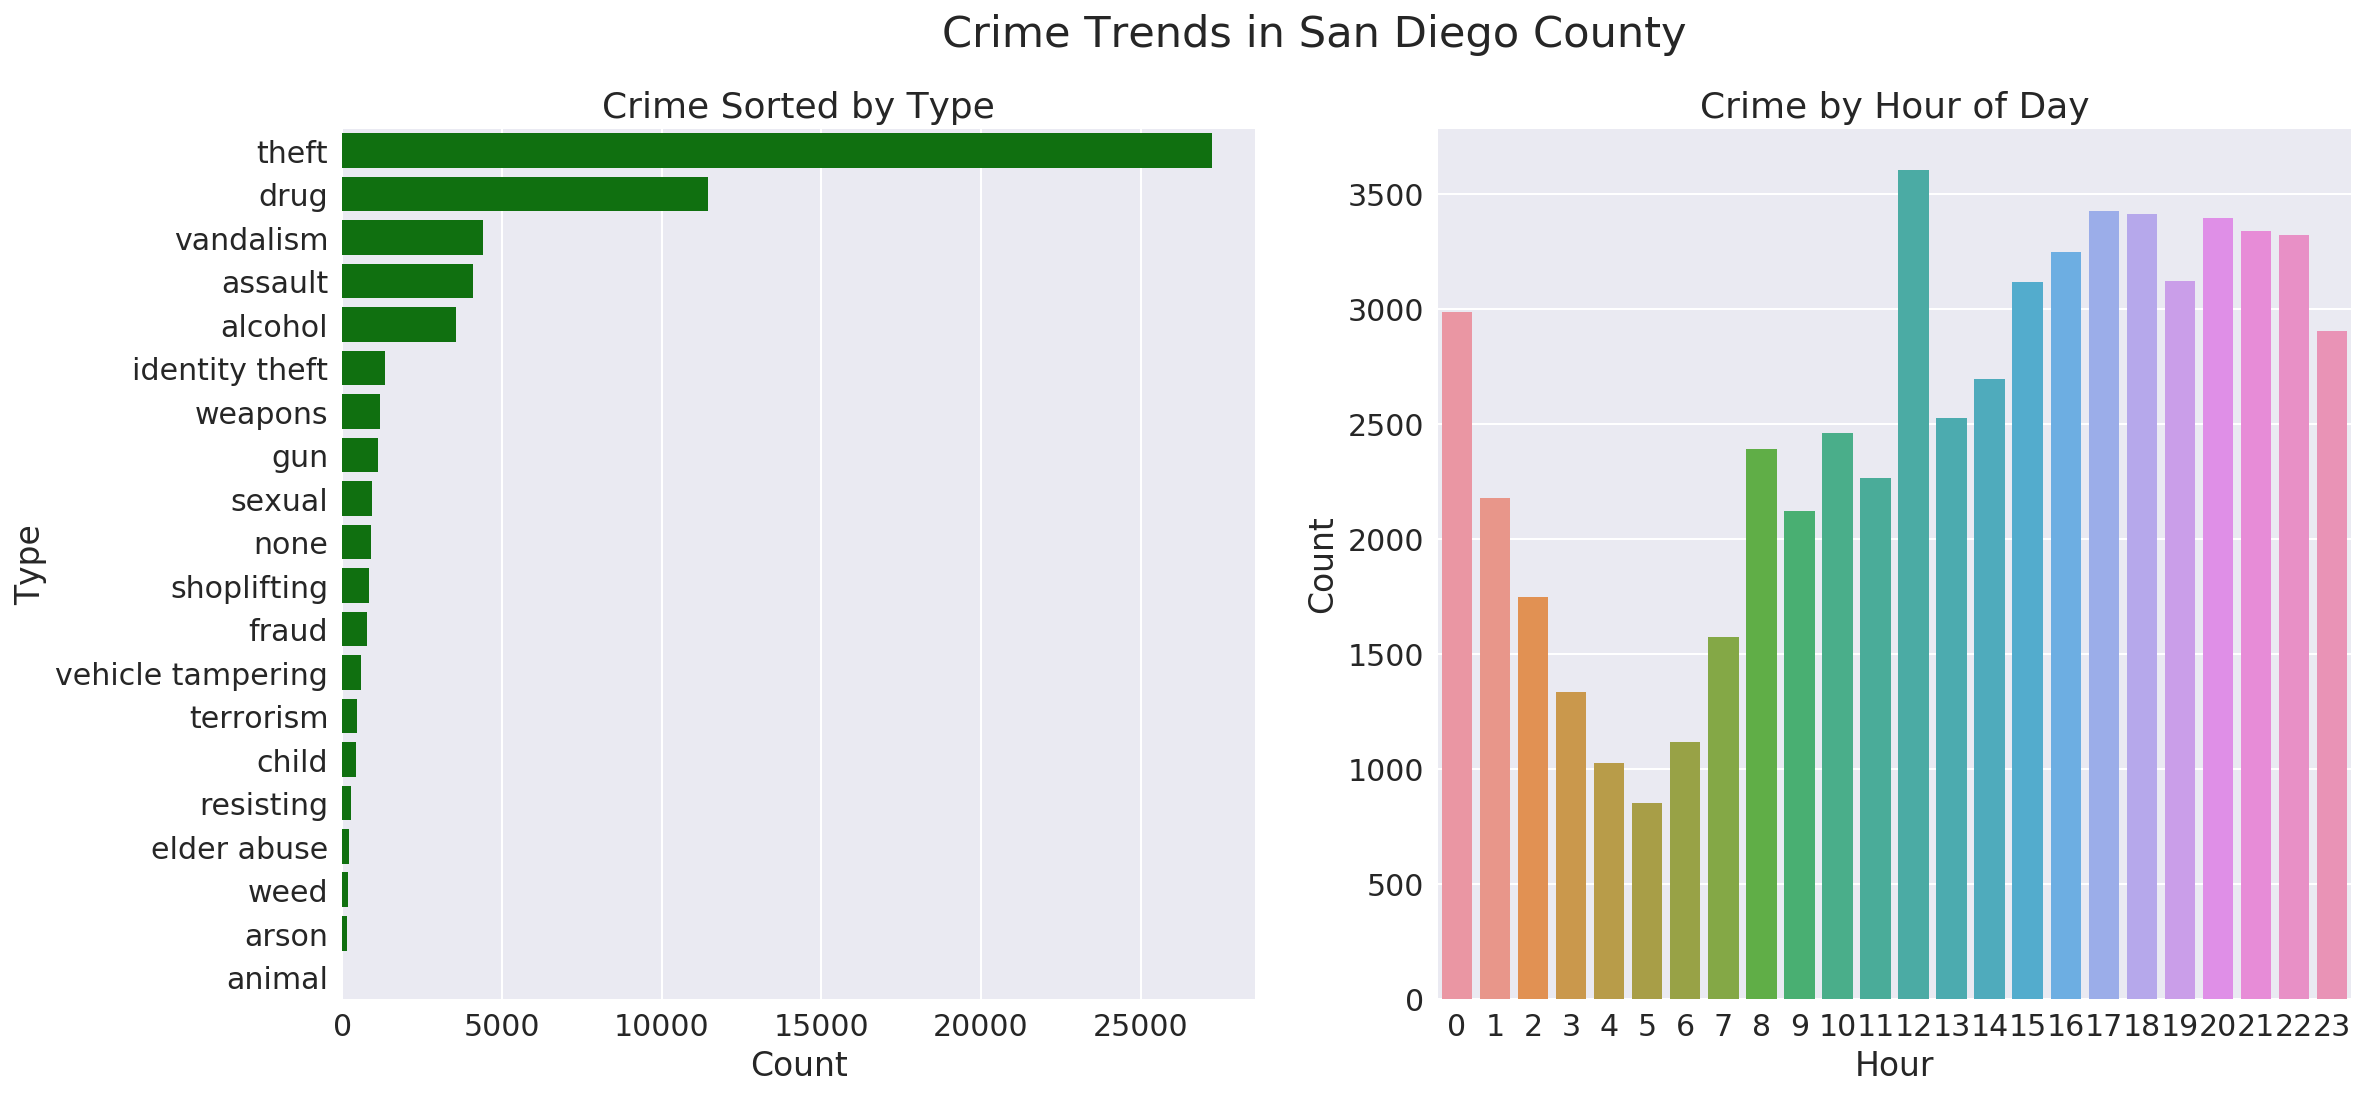

In [38]:
fig, axarr = plt.subplots(1, 2, figsize=(18, 8))
plt.suptitle("Crime Trends in San Diego County")

# sns.countplot(y='type', data=df[df['hour'] == 1], order=df['type'].value_counts().index, color='green')
sns.set(font_scale=1.5)
ax = sns.countplot(y='type', data=df, order=df['type'].value_counts().index, color='green', ax = axarr[0])
ax.title.set_text("Crime Sorted by Type")
ax.set_xlabel('Count')
ax.set_ylabel('Type')

# sns.countplot(x='hour', data=df.drop(df[df['type'] == 'identity theft'].index))
# sns.countplot(x='hour', data=df[df['type'] == 'theft'])
ax2 = sns.countplot(x='hour', data=df, ax=axarr[1])
ax2.title.set_text("Crime by Hour of Day")
ax2.set_xlabel('Hour')
ax2.set_ylabel('Count')

Text(0,0.5,'Count')

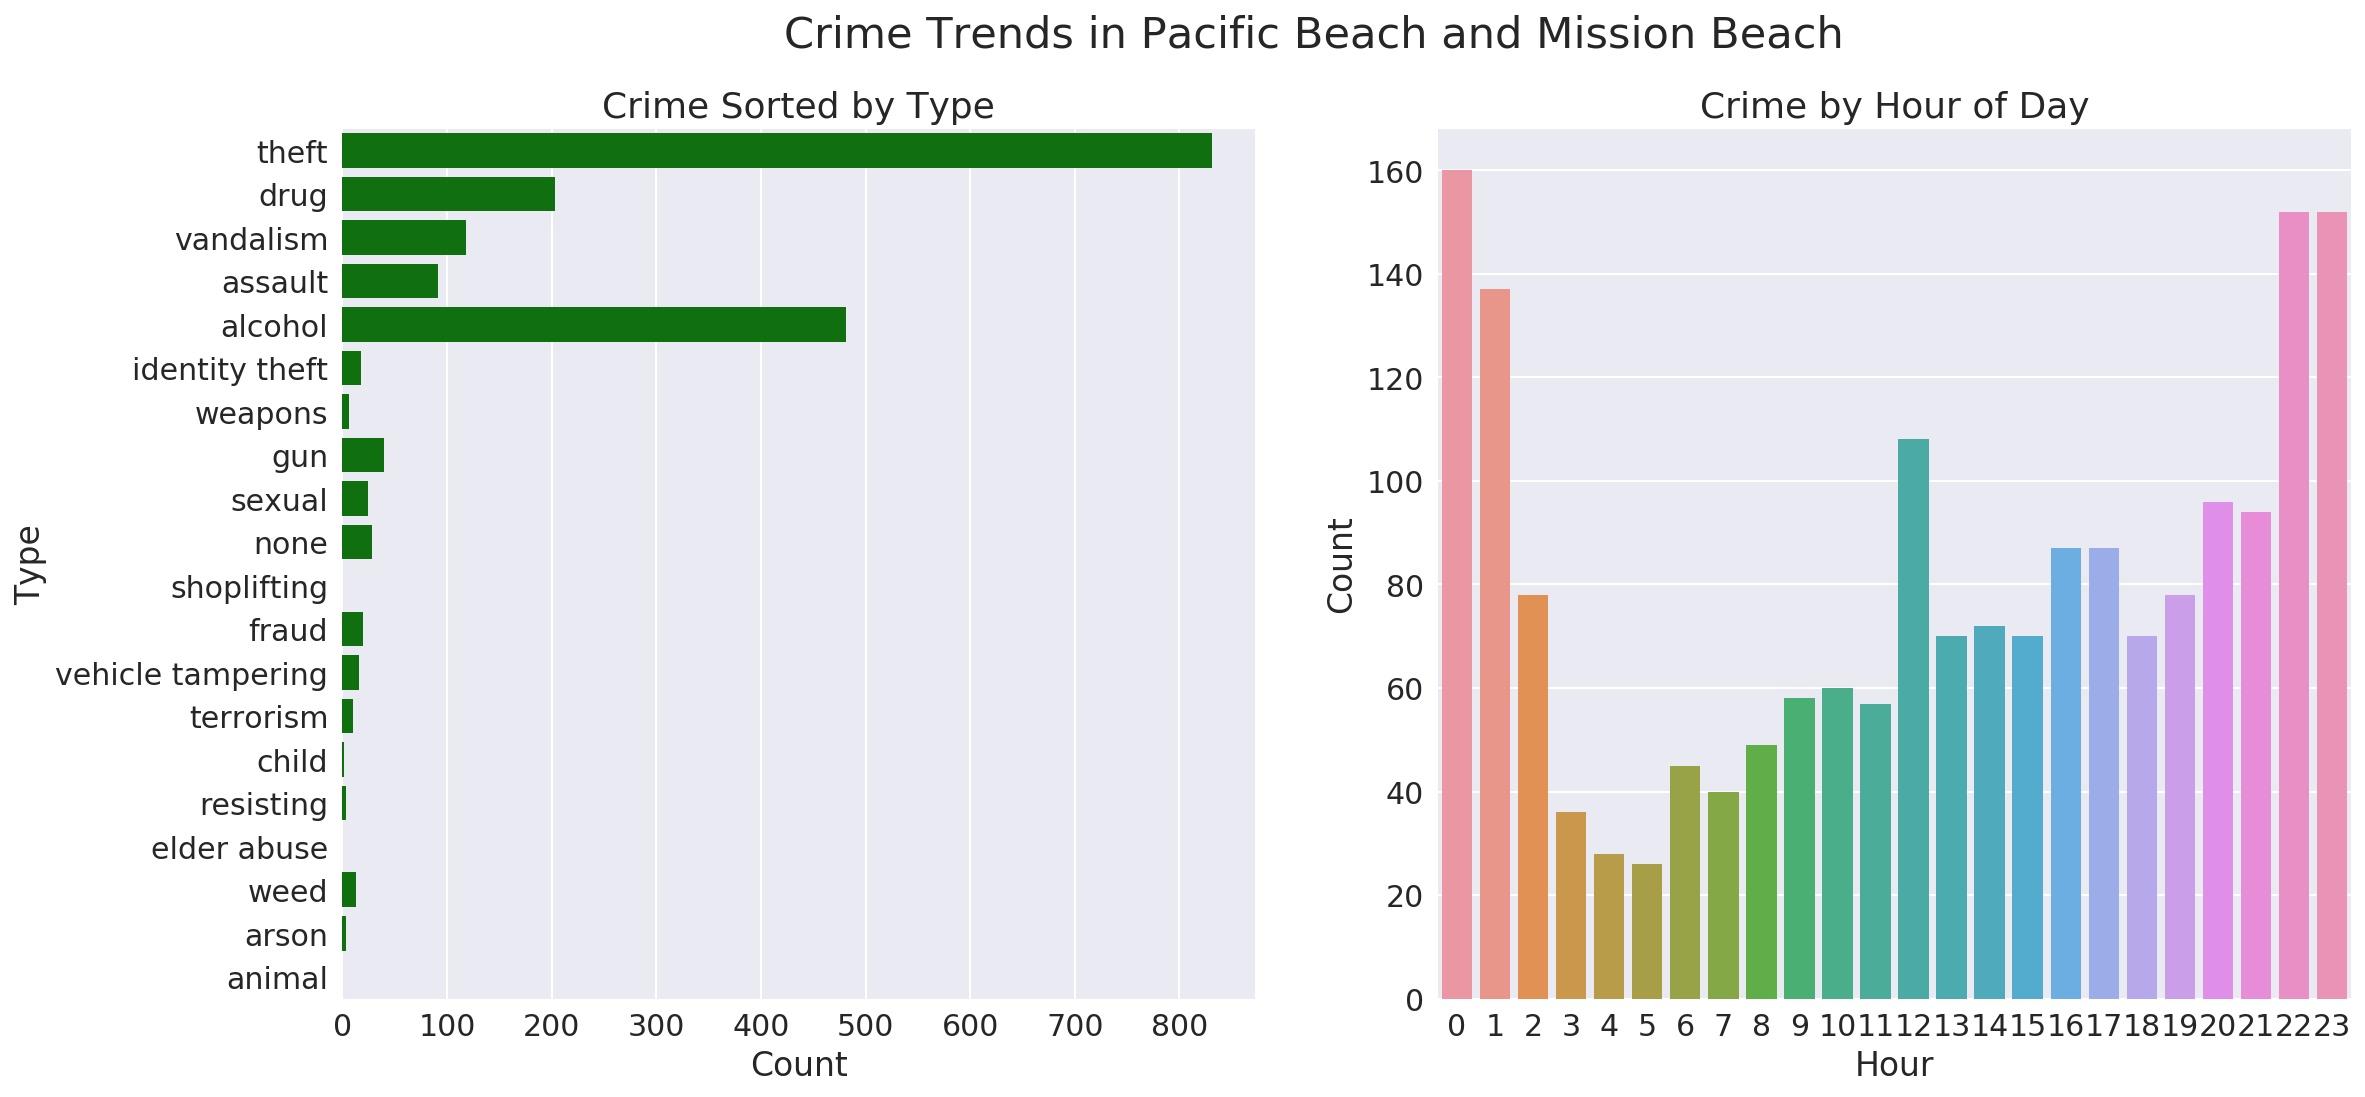

In [45]:
pb = df[df['zip'] == 92109.0]

fig, axarr = plt.subplots(1, 2, figsize=(18, 8))
plt.suptitle("Crime Trends in Pacific Beach and Mission Beach")

sns.set(font_scale=1.5)
ax = sns.countplot(y='type', data=pb, order=df['type'].value_counts().index, color='green', ax = axarr[0])
ax.title.set_text("Crime Sorted by Type")
ax.set_xlabel('Count')
ax.set_ylabel('Type')

ax2 = sns.countplot(x='hour', data=pb, ax=axarr[1])
ax2.title.set_text("Crime by Hour of Day")
ax2.set_xlabel('Hour')
ax2.set_ylabel('Count')


# sns.countplot(x='hour', data=pb)
# sns.countplot(y='type', data=pb, order=df['type'].value_counts().index, color='green')

Text(0,0.5,'Count')

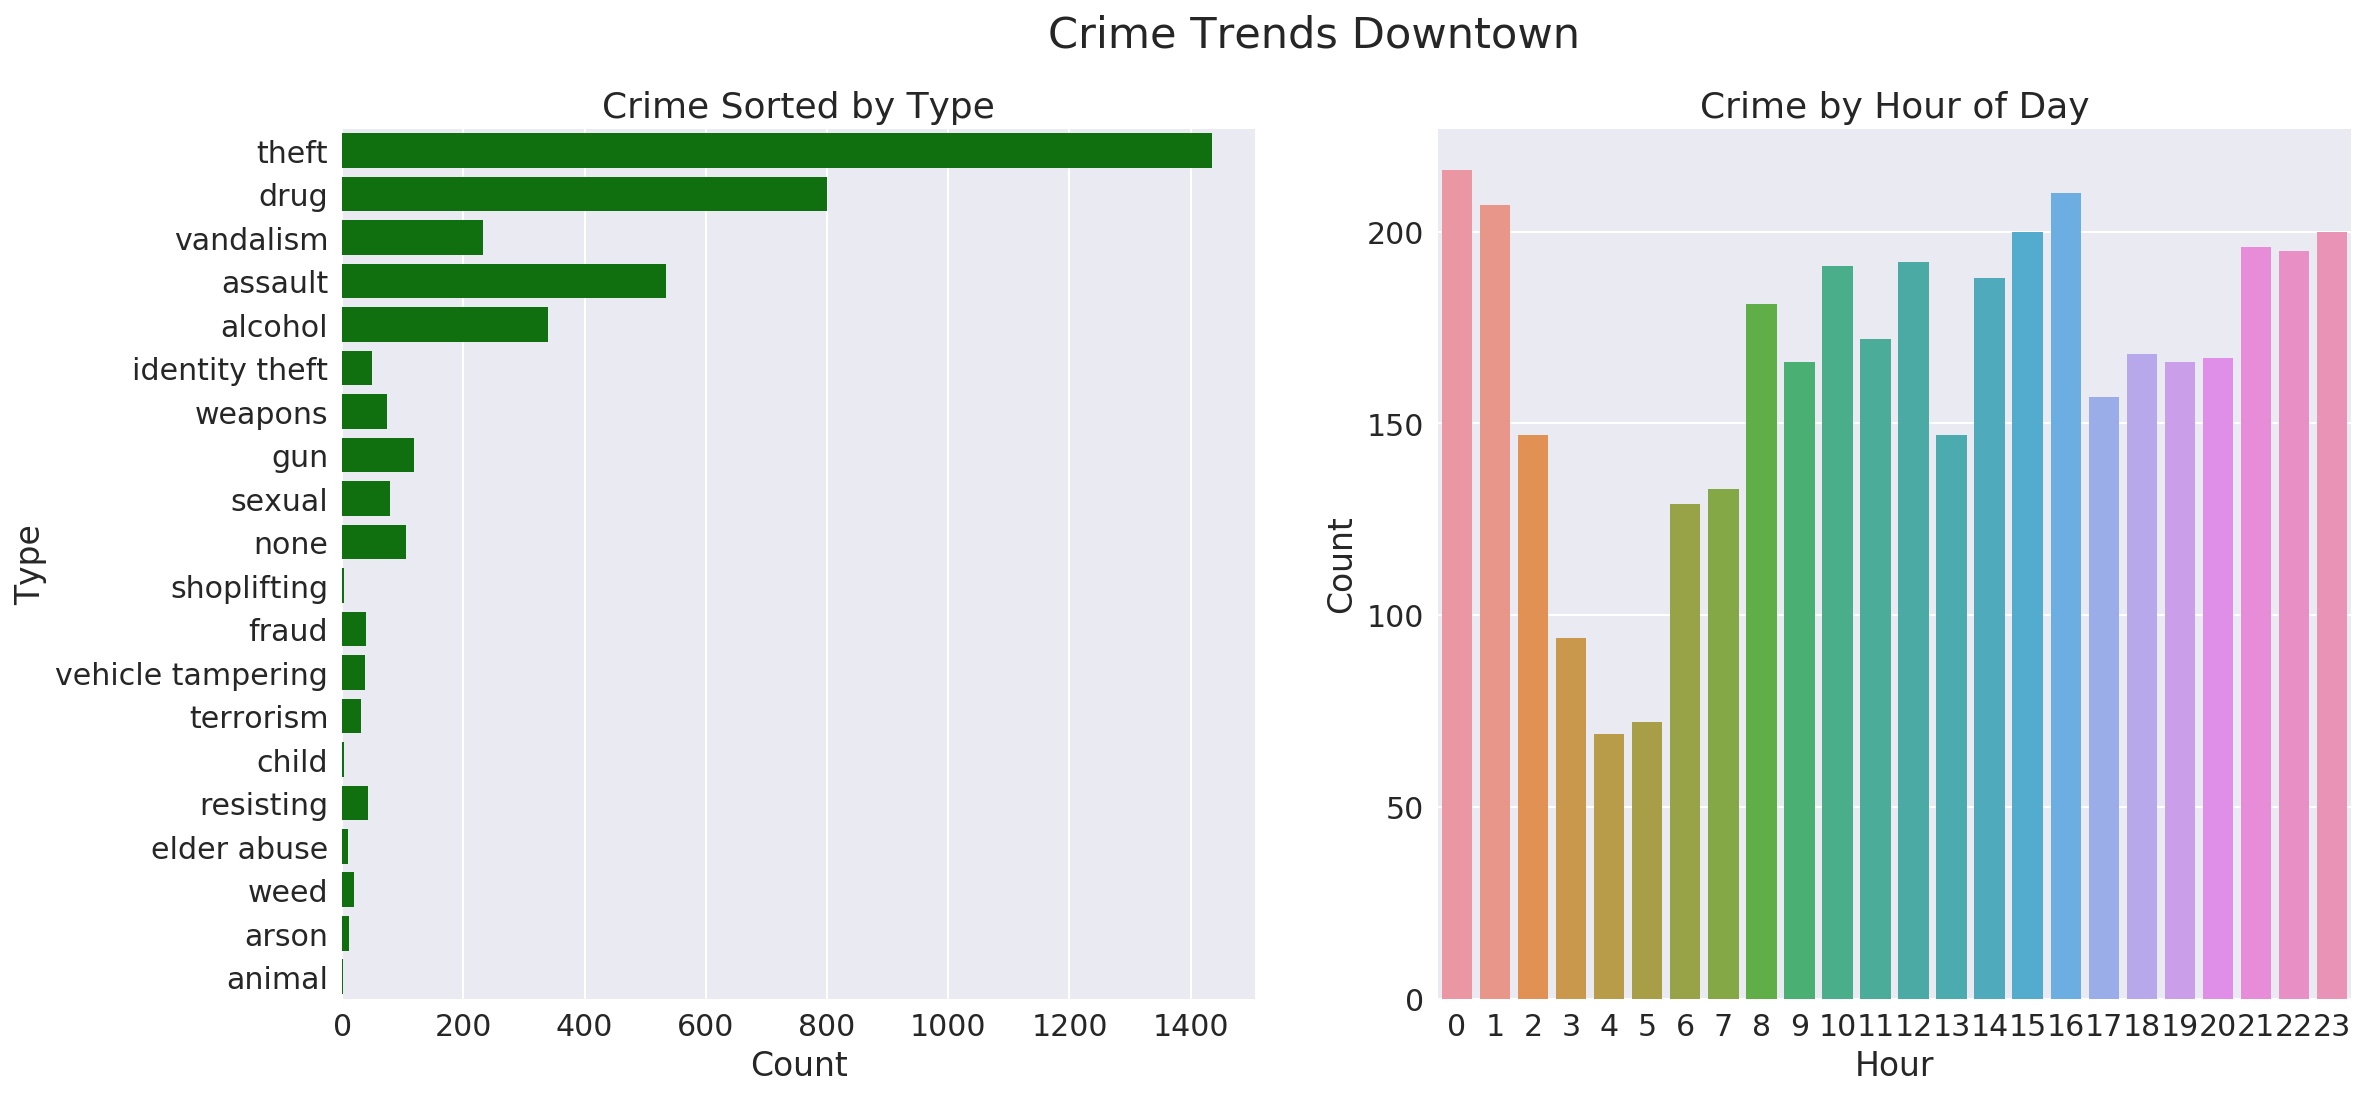

In [48]:
dt = df[df['zip'] == 92101.0]

fig, axarr = plt.subplots(1, 2, figsize=(18, 8))
plt.suptitle("Crime Trends Downtown")

sns.set(font_scale=1.5)
ax = sns.countplot(y='type', data=dt, order=df['type'].value_counts().index, color='green', ax = axarr[0])
ax.title.set_text("Crime Sorted by Type")
ax.set_xlabel('Count')
ax.set_ylabel('Type')

ax2 = sns.countplot(x='hour', data=dt, ax=axarr[1])
ax2.title.set_text("Crime by Hour of Day")
ax2.set_xlabel('Hour')
ax2.set_ylabel('Count')

In [39]:
# df.drop(df[df['type'] == 'identity theft'].index)


In [40]:
# df[df['type'] == 'identity theft']

In [167]:
def hour_range(row):
    h = row['time_fix']
    h = h.hour
    if 0 <= h < 6:
        return 0
    if 6 <= h < 12:
        return 1
    if 12 <= h < 18:
        return 2
    else:
        return 3
    

df['hour_range'] = df.apply(hour_range, axis=1)

In [41]:
# sns.countplot(x='hour_range', data=df)

In [42]:
# df.groupby(['zip']).size().sort_values()

In [310]:
pb = df[df['zip'] == 92109.0]
pb.head()

,agency,crime,time,addr,zip,community,time_fix,doy,month,hour,type,hour_range
1008,SAN DIEGO,TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT...,10/27/2017 17:00:00,800 BLOCK SANTA CLARA PLACE,92109.0,SAN DIEGO,2017-10-27 17:00:00,300,10,17,theft,2
1262,SAN DIEGO,TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT...,12/3/2017 23:30:00,1500 BLOCK QUIVIRA WAY,92109.0,SAN DIEGO,2017-12-03 23:30:00,337,12,23,theft,3
2380,SAN DIEGO,BURGLARY/UNSPECIFIED,12/23/2017 20:45:00,1000 BLOCK DIAMOND STREET,92109.0,SAN DIEGO,2017-12-23 20:45:00,357,12,20,theft,3
2383,SAN DIEGO,THREATEN CRIME WITH INTENT TO TERRORIZE,9/20/2017 20:30:00,1300 BLOCK PACIFIC BEACH DRIVE,92109.0,SAN DIEGO,2017-09-20 20:30:00,263,9,20,terrorism,3
2708,SAN DIEGO,RAPE: VICTIM DRUGGED,9/3/2017 1:45:00,4000 BLOCK HAINES STREET,92109.0,SAN DIEGO,2017-09-03 01:45:00,246,9,1,drug,0


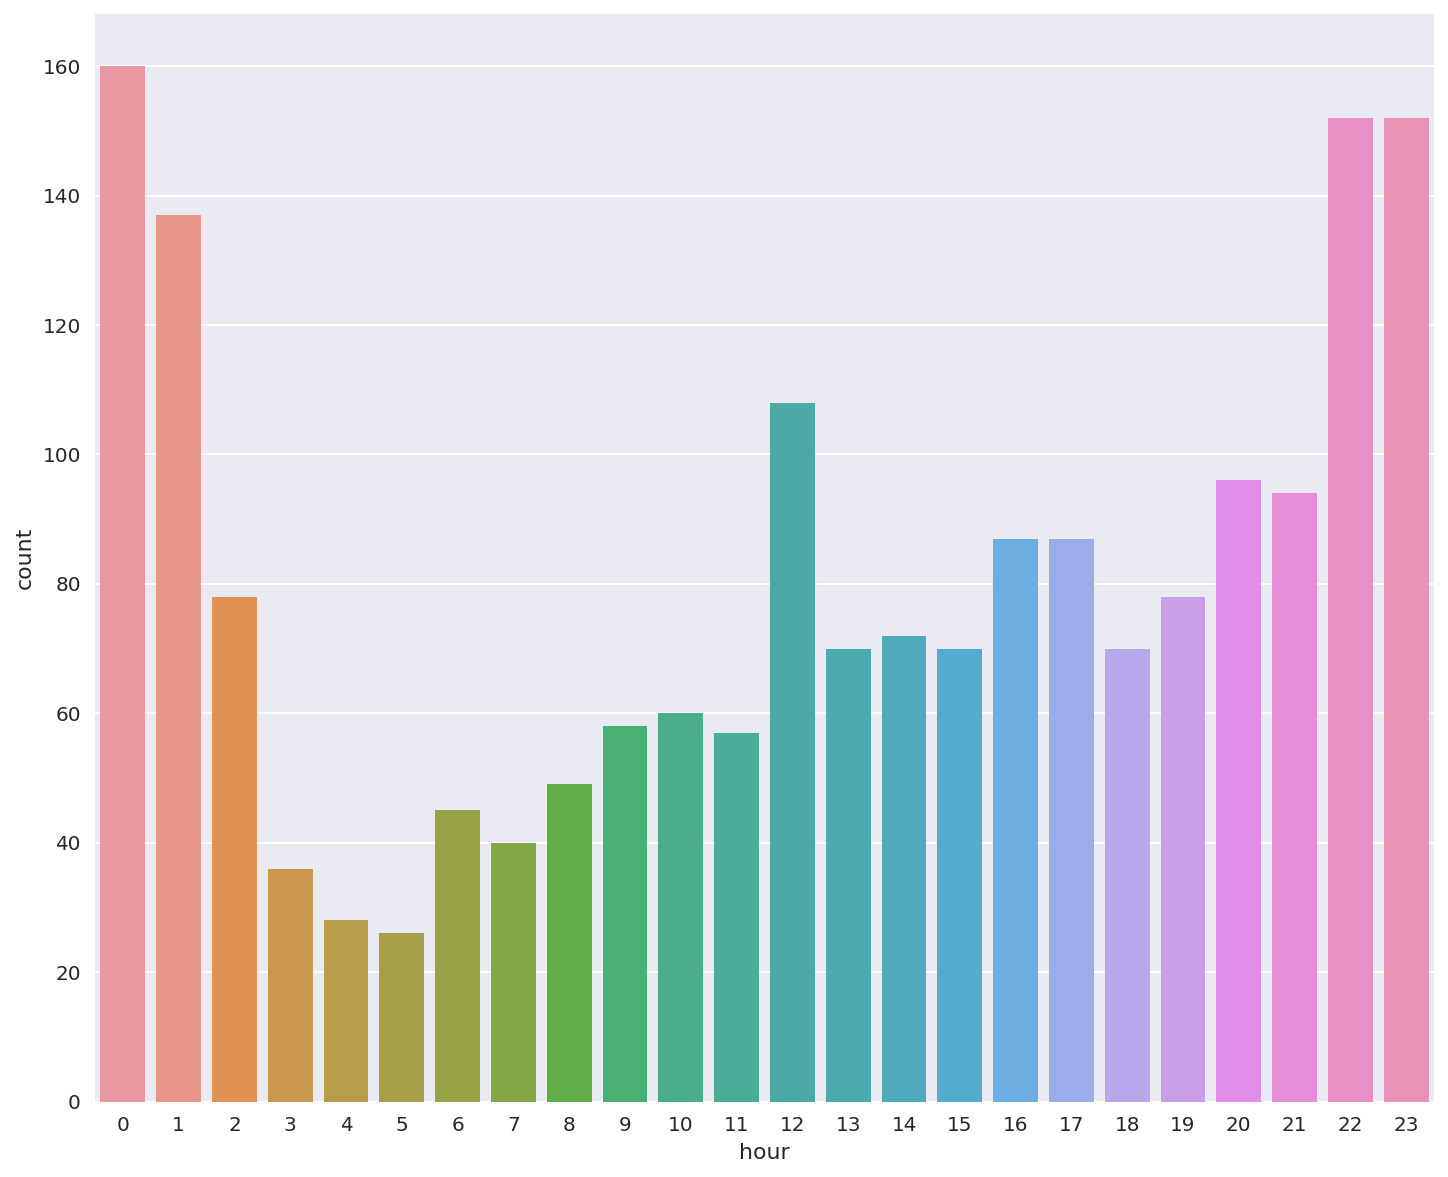

In [311]:
sns.countplot(x='hour', data=pb)

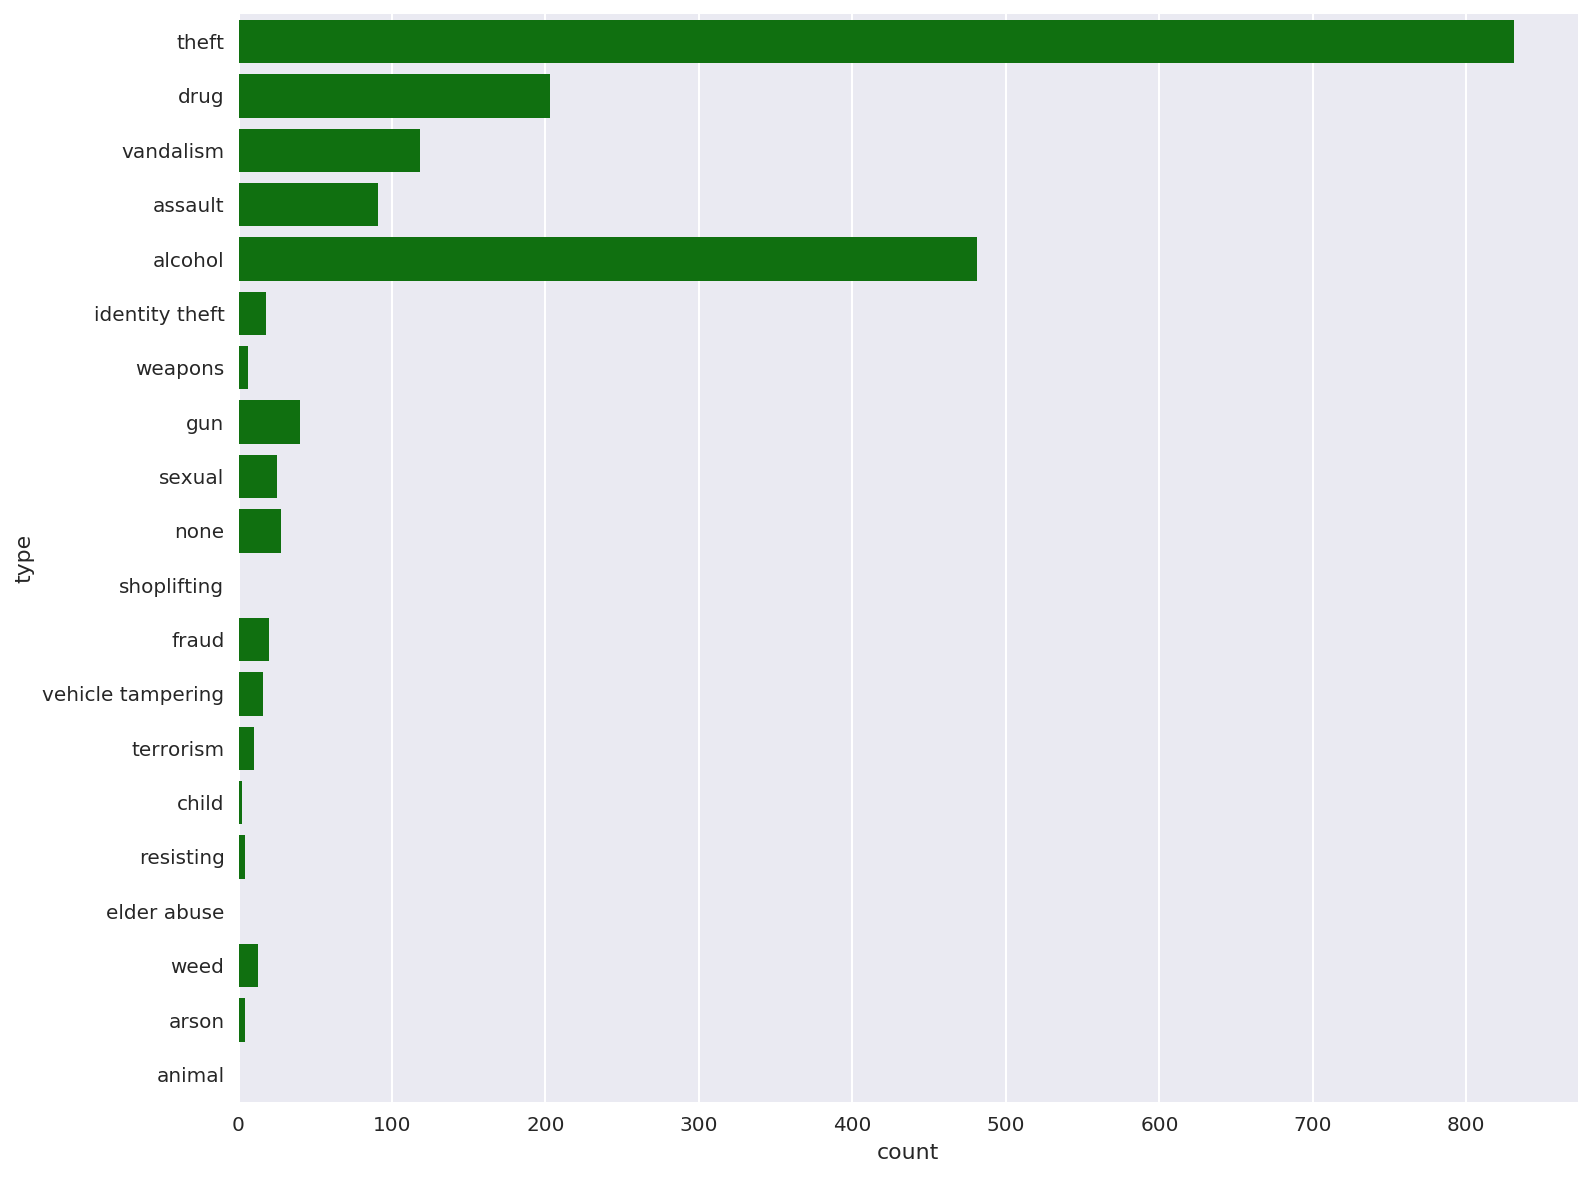

In [312]:
sns.countplot(y='type', data=pb, order=df['type'].value_counts().index, color='green')

In [318]:
dt = df[df['zip'] == 92101.0]
dt.head()

,agency,crime,time,addr,zip,community,time_fix,doy,month,hour,type,hour_range
1,HARBOR POLICE,SELL LIQUOR TO MINOR (M),9/23/2017 18:28:00,3200 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-09-23 18:28:00,266,9,18,alcohol,3
2,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/6/2017 8:48:00,600 BLOCK CONVENTION WAY,92101.0,SAN DIEGO,2017-10-06 08:48:00,279,10,8,drug,1
3,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2017 19:45:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-10-11 19:45:00,284,10,19,drug,3
4,HARBOR POLICE,POSS NARCOTIC CONTROLLED SUBS (M),10/21/2017 23:36:00,100 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO,2017-10-21 23:36:00,294,10,23,drug,3
6,HARBOR POLICE,MANUFACTURE/SALE/POSSESS/ETC METAL KNUCKLES (M),11/1/2017 17:15:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-11-01 17:15:00,305,11,17,weapons,2


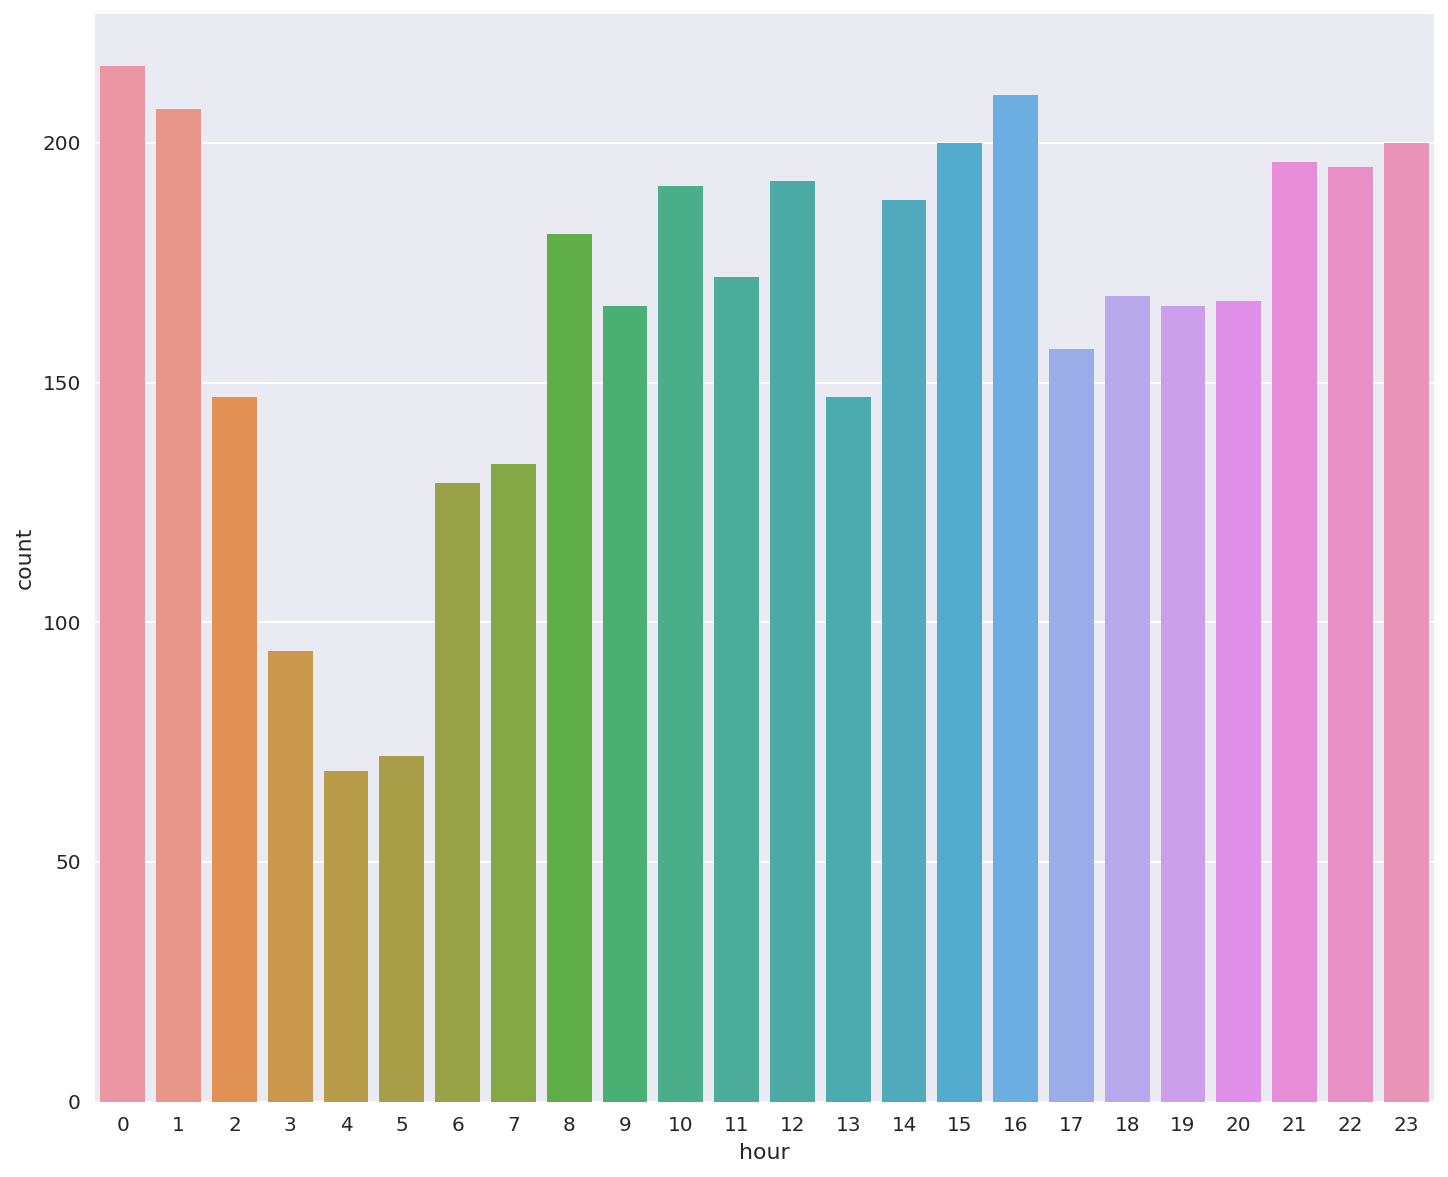

In [319]:
sns.countplot(x='hour', data=dt)

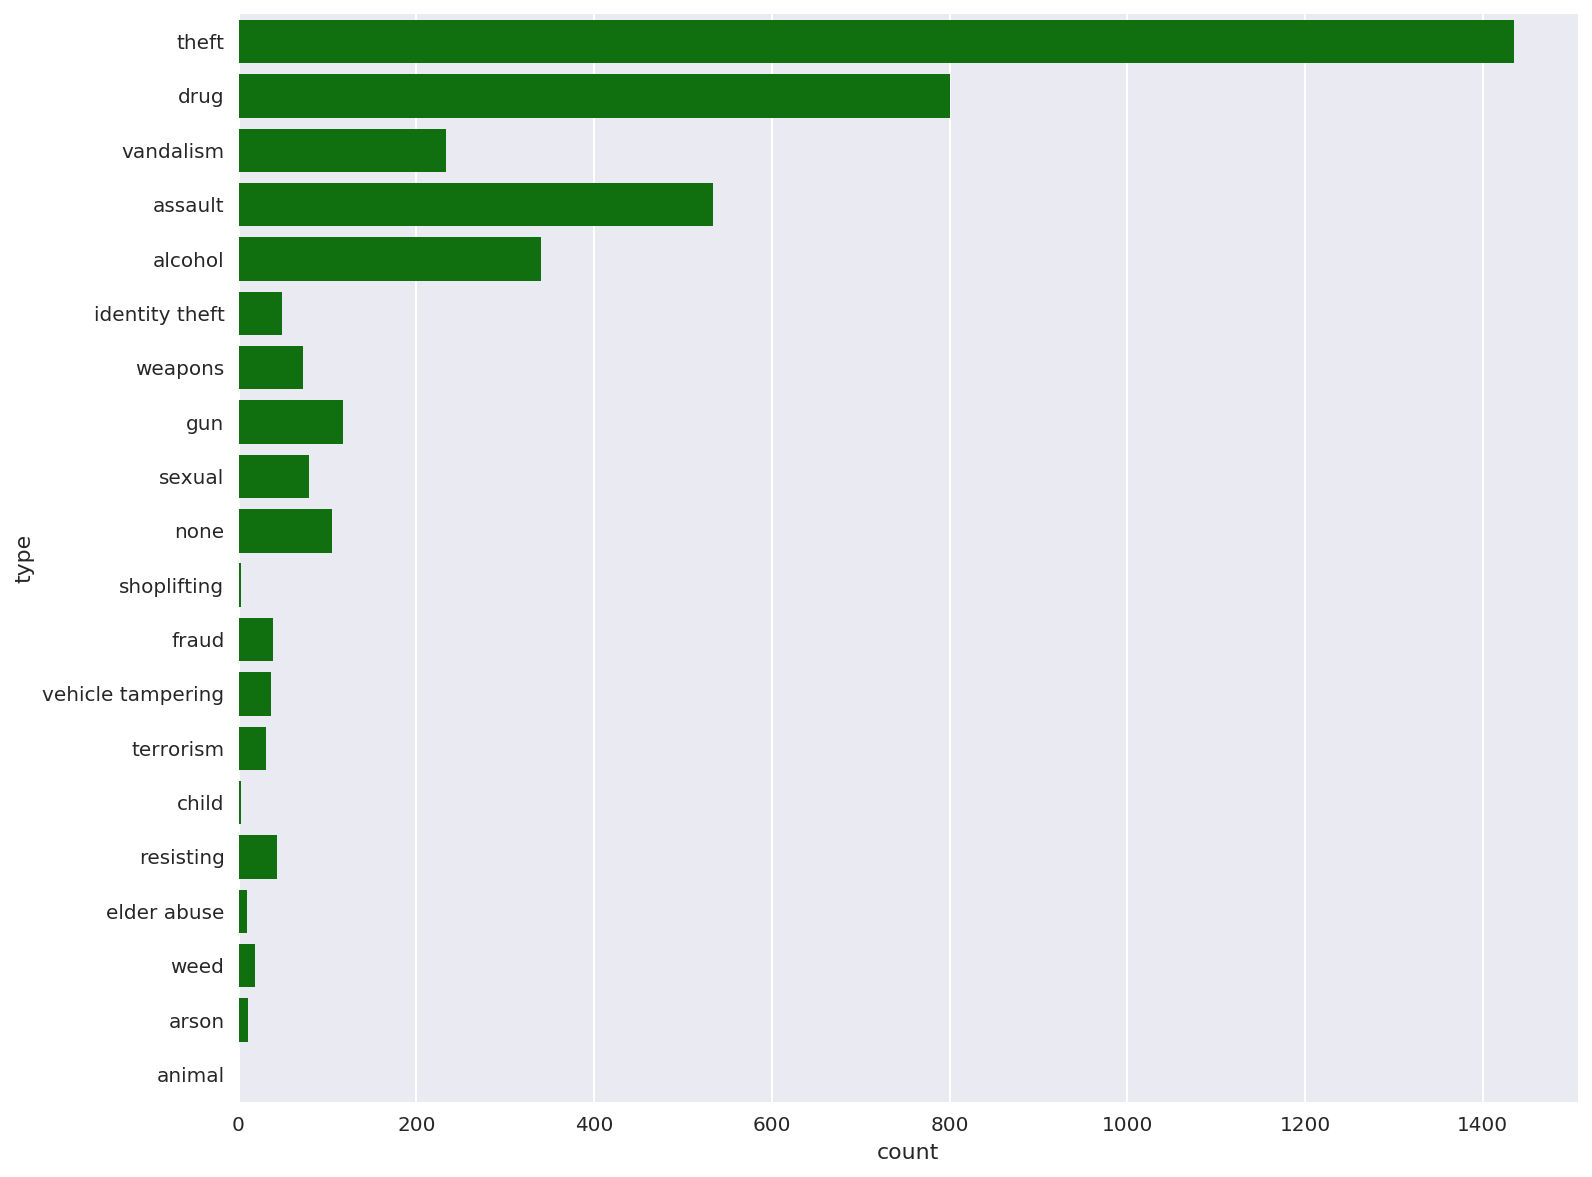

In [320]:
sns.countplot(y='type', data=dt, order=df['type'].value_counts().index, color='green')

In [66]:
mc = pd.read_excel('monthly_crime.xls')
mc.head()

,SORT_ORDER,Crime,Jan / 2008,Feb / 2008,Mar / 2008,Apr / 2008,May / 2008,Jun / 2008,Jul / 2008,Aug / 2008,Sep / 2008,Oct / 2008,Nov / 2008,Dec / 2008,Jan / 2009,Feb / 2009,Mar / 2009,Apr / 2009,May / 2009,Jun / 2009,Jul / 2009,Aug / 2009,Sep / 2009,Oct / 2009,Nov / 2009,Dec / 2009,Jan / 2010,Feb / 2010,Mar / 2010,Apr / 2010,May / 2010,Jun / 2010,Jul / 2010,Aug / 2010,Sep / 2010,Oct / 2010,Nov / 2010,Dec / 2010,Jan / 2011,Feb / 2011,Mar / 2011,Apr / 2011,May / 2011,Jun / 2011,Jul / 2011,Aug / 2011,Sep / 2011,Oct / 2011,Nov / 2011,Dec / 2011,Jan / 2012,Feb / 2012,Mar / 2012,Apr / 2012,May / 2012,Jun / 2012,Jul / 2012,Aug / 2012,Sep / 2012,Oct / 2012,Nov / 2012,Dec / 2012,Jan / 2013,Feb / 2013,Mar / 2013,Apr / 2013,May / 2013,Jun / 2013,Jul / 2013,Aug / 2013,Sep / 2013,Oct / 2013,Nov / 2013,Dec / 2013,Jan / 2014,Feb / 2014,Mar / 2014,Apr / 2014,May / 2014,Jun / 2014,Jul / 2014,Aug / 2014,Sep / 2014,Oct / 2014,Nov / 2014,Dec / 2014,Jan / 2015,Feb / 2015,Mar / 2015,Apr / 2015,May / 2015,Jun / 2015,Jul / 2015,Aug / 2015,Sep / 2015,Oct / 2015,Nov / 2015,Dec / 2015,Jan / 2016,Feb / 2016,Mar / 2016,Apr / 2016,May / 2016,Jun / 2016,Jul / 2016,Aug / 2016,Sep / 2016,Oct / 2016,Nov / 2016,Dec / 2016,Jan / 2017,Feb / 2017,Mar / 2017,Apr / 2017,May / 2017,Jun / 2017,Jul / 2017,Aug / 2017,Sep / 2017,Oct / 2017,Nov / 2017,Dec / 2017,Jan / 2018,Feb / 2018,Total
0,1,Murder,5,7,9,11,8,9,13,7,8,5,2,7,8,4,6,8,12,1,10,7,6,5,3,8,3,7,4,7,2,10,5,4,6,6,2,13,10,4,6,7,12,10,11,5,5,5,5,1,13,7,10,12,8,10,7,11,7,8,5,6,8,3,5,11,5,8,5,6,4,4,5,6,1,4,6,12,8,9,5,4,3,2,10,8,7,2,7,6,10,10,6,5,3,5,15,5,8,2,7,12,10,10,9,4,3,15,8,14,6,7,8,2,8,10,9,5,5,4,6,6,4,0,828
1,2,Rape**,53,55,57,89,74,69,79,75,85,80,68,49,50,63,61,64,61,68,62,65,76,69,51,55,43,51,61,49,66,61,67,71,56,55,52,36,48,40,55,44,57,46,78,59,43,63,47,68,54,57,58,76,60,63,61,48,62,61,36,43,34,54,55,60,49,59,59,54,60,56,60,59,62,58,56,63,64,64,53,40,70,89,55,54,74,88,80,79,75,105,100,109,113,96,81,81,95,78,112,77,88,95,86,112,91,101,76,61,90,96,94,66,99,84,82,102,83,110,103,79,33,3,8237
2,3,Armed Robbery,113,131,125,145,129,118,141,122,125,131,106,156,105,87,98,118,139,138,125,139,143,153,128,125,126,95,103,79,87,115,109,104,78,122,115,136,93,67,72,71,85,113,97,95,104,94,113,128,102,102,115,87,106,92,112,113,99,107,103,135,112,98,88,111,105,64,90,103,105,105,105,124,122,89,79,58,72,76,72,103,77,82,76,117,106,80,67,78,76,97,88,101,81,82,64,78,106,82,82,82,97,108,103,97,76,79,74,94,138,96,106,80,99,85,103,103,99,115,102,93,54,5,12303
3,4,Strong Arm Robbery,173,226,181,239,181,195,247,184,192,234,183,220,180,178,228,199,218,237,236,200,236,225,175,205,178,167,200,162,176,190,160,172,158,163,168,180,191,136,129,151,161,168,168,182,135,181,139,178,157,112,172,146,184,140,155,178,186,169,147,178,165,129,140,158,177,137,149,150,151,152,156,176,124,143,135,145,152,127,147,121,163,137,123,138,120,131,145,121,144,165,169,169,165,168,121,170,148,112,140,133,155,132,157,158,145,142,126,124,131,118,144,120,150,161,178,178,135,162,162,129,66,5,19683
4,5,Aggravated Assault**,540,550,628,771,661,573,689,692,731,736,501,760,555,607,609,716,674,745,681,666,775,702,563,593,635,608,555,622,635,682,641,661,633,600,663,578,591,532,602,553,598,640,636,674,602,578,579,609,626,596,596,694,667,675,701,635,742,708,620,636,555,554,576,667,696,611,682,620,682,661,568,575,608,553,665,634,615,546,587,632,508,561,522,538,536,565,588,584,553,588,672,695,557,525,500,547,525,448,558,560,638,623,646,641,574,586,576,574,553,452,582,552,635,638,654,626,578,683,572,525,307,28,73981


In [68]:
mc = pd.read_excel('monthly_crime.xls').transpose()
mc.columns = mc.iloc[1]
mc.drop(mc.index[0], inplace=True) # drop crime row
mc.drop(mc.index[0], inplace=True) # drop sort_order row
mc.drop('Jan / 2018', inplace=True)
mc.drop('Feb / 2018', inplace=True)
mc.drop('Total', inplace=True)
# mc
cols = [u'murder', u'rape', u'armed_robbery', u'strong_arm_robbery', u'aggravated_assault', u'total_violent_crime',
    u'residential_burglary', u'non_residential_burglary', u'total_burglary',
    u'theft_above_400', u'theft_below_400', u'total_thefts',
    u'motor_vehicle_theft', u'total_property_crime', u'total']
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
new = pd.MultiIndex.from_product([years, months], names=['years', 'months'])
# new.values = mc.values
# new.columns = cols
# new
mc.set_index(new, inplace=True)
mc.columns = cols
# mc.xs('Jan', level=1, drop_level=False)['total']
mc.head(12)

murder rape armed_robbery strong_arm_robbery aggravated_assault  \
years months                                                                   
2008  Jan         5   53           113                173                540   
      Feb         7   55           131                226                550   
      Mar         9   57           125                181                628   
      Apr        11   89           145                239                771   
      May         8   74           129                181                661   
      June        9   69           118                195                573   
      July       13   79           141                247                689   
      Aug         7   75           122                184                692   
      Sep         8   85           125                192                731   
      Oct         5   80           131                234                736   
      Nov         2   68           106                183                501   
      Dec         7   49           156                220                760   

             total_violent_crime residential_burglary  \
years months                                            
2008  Jan                    884                  728   
      Feb                    969                  792   
      Mar                   1000                  752   
      Apr                   1255                  833   
      May                   1053                  805   
      June                   964                  756   
      July                  1169                  857   
      Aug                   1080                  790   
      Sep                   1141                  866   
      Oct                   1186                  840   
      Nov                    860                  889   
      Dec                   1192                  989   

             non_residential_burglary total_burglary theft_above_400  \
years months                                                           
2008  Jan                         560           1288            1459   
      Feb                         616           1408            1487   
      Mar                         680           1432            1449   
      Apr                         661           1494            1462   
      May                         577           1382            1469   
      June                        542           1298            1674   
      July                        542           1399            1610   
      Aug                         488           1278            1441   
      Sep                         546           1412            1440   
      Oct                         528           1368            1432   
      Nov                         537           1426            1249   
      Dec                         641           1630            1534   

             theft_below_400 total_thefts motor_vehicle_theft  \
years months                                                    
2008  Jan               2342         3801                1850   
      Feb               2323         3810                1690   
      Mar               2274         3723                1580   
      Apr               2532         3994                1824   
      May               2385         3854                1559   
      June              2215         3889                1569   
      July              2312         3922                1645   
      Aug               2376         3817                1507   
      Sep               2456         3896                1930   
      Oct               2499         3931                1653   
      Nov               2049         3298                1411   
      Dec               2344         3878                1510   

             total_property_crime total  
years months                             
2008  Jan                    6939  7823  
      Feb                    6908  7877  
     

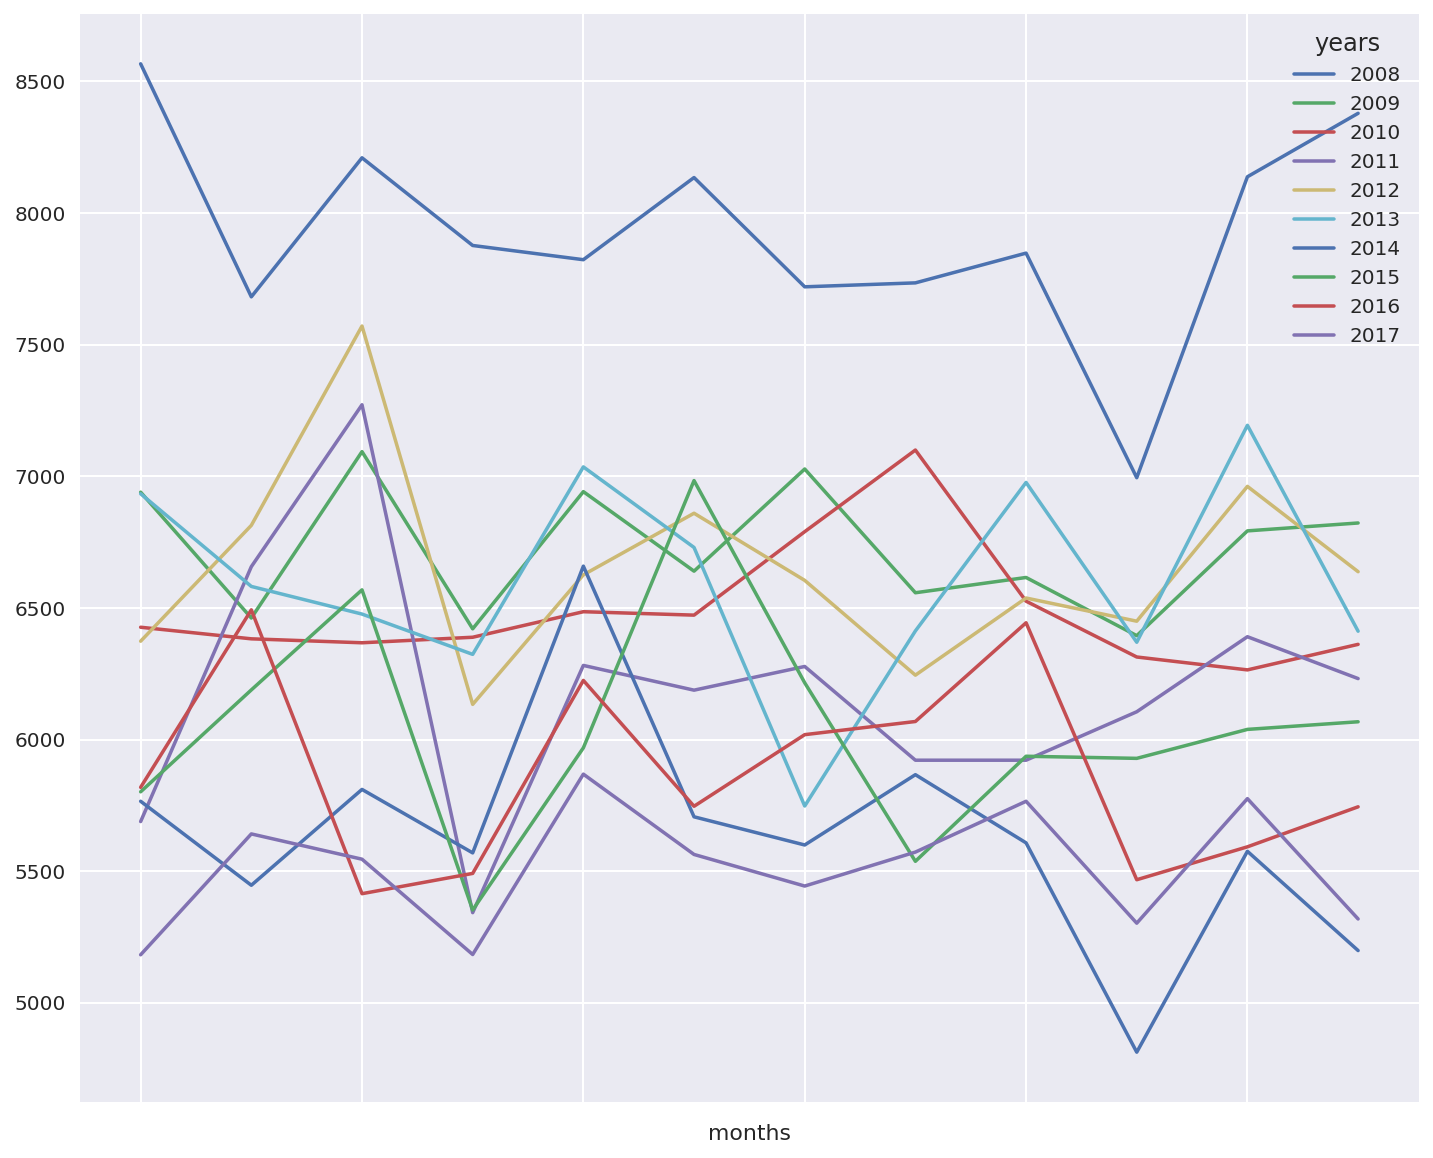

In [178]:
mc['total'].unstack(level=0).plot.line(figsize=(12, 10))

Text(48.5151,0.5,'Crimes Committed')

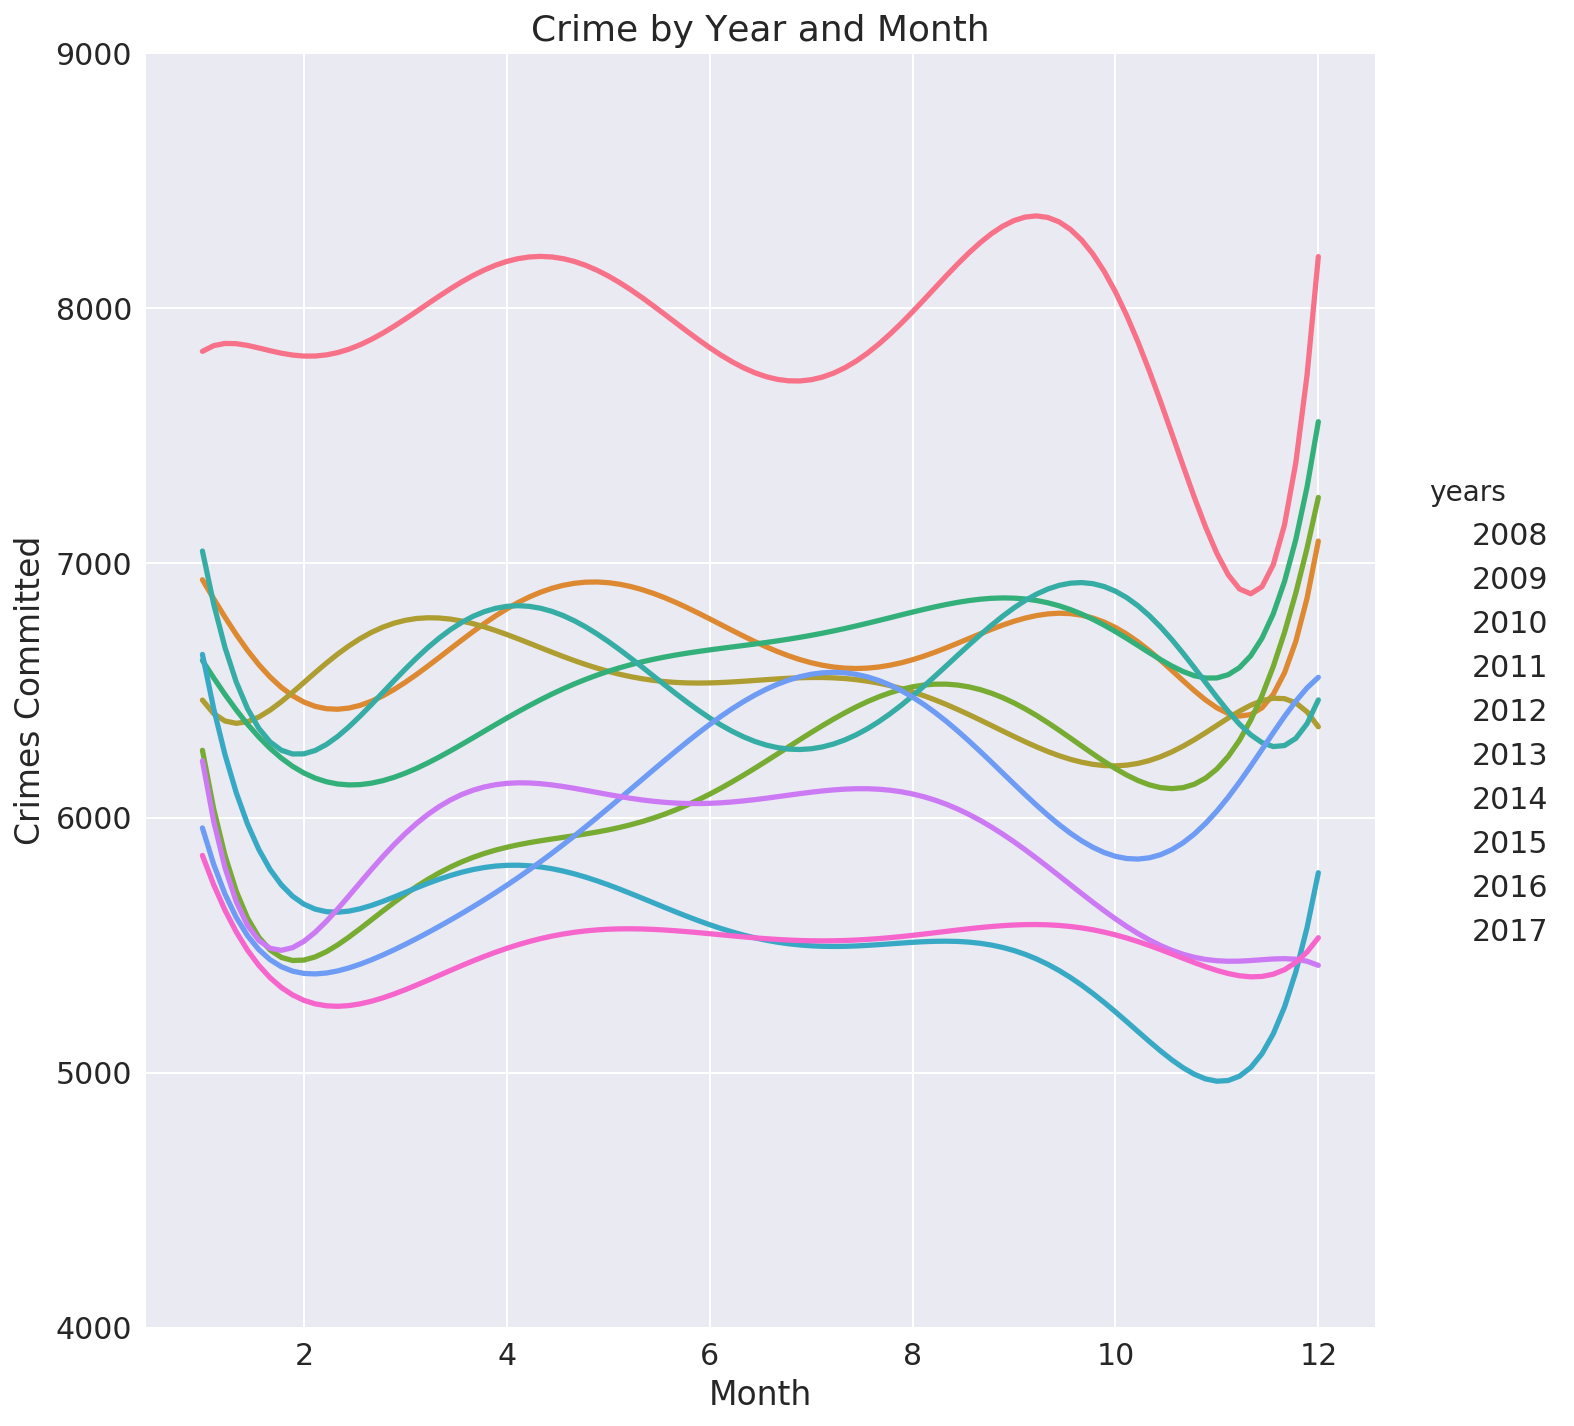

In [56]:
mc['m'] = np.tile(np.arange(1, 13), 10)
# mc.reset_index()

lm = sns.lmplot(data=mc.reset_index(), x='m', y='total', hue='years',
                order=7, truncate=True, size=10, ci=None, scatter_kws={"s": 0})
ax = lm.axes[0, 0]
ax.set_ylim(4000, 9000)
ax.title.set_text("Crime by Year and Month")
ax.set_xlabel('Month')
ax.set_ylabel('Crimes Committed')

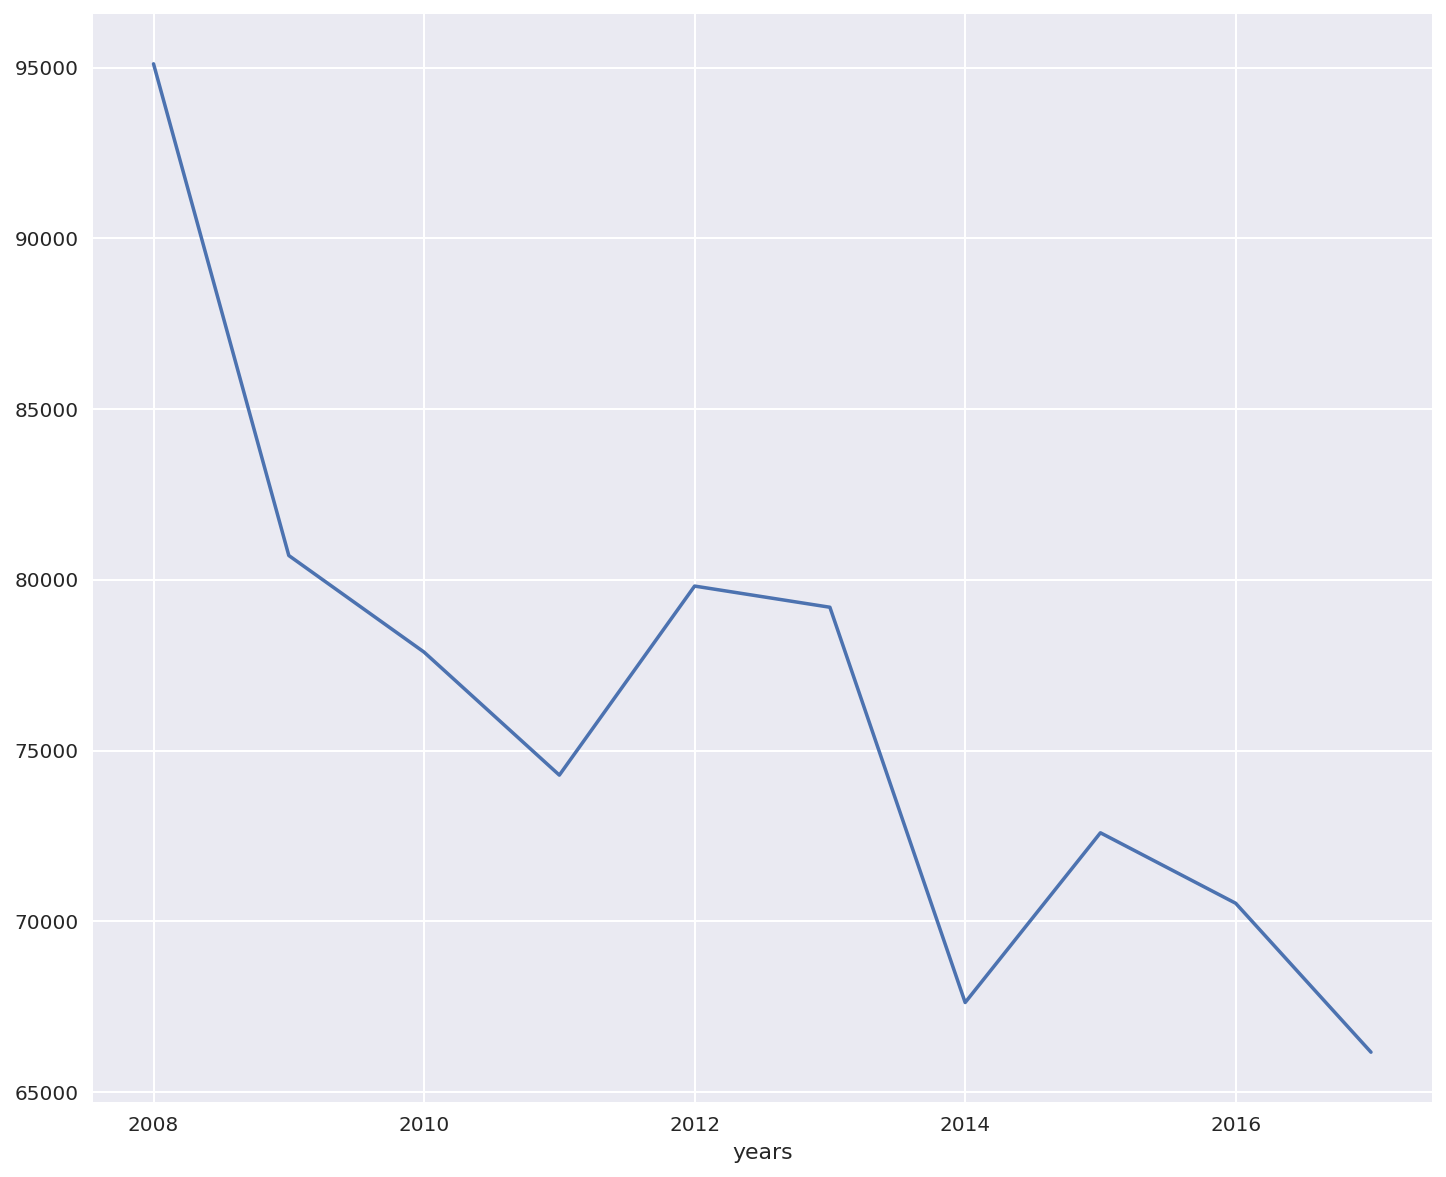

In [179]:
mc['total'].unstack(level=0).sum().plot.line(figsize=(12, 10))

Text(0,0.5,'Crimes Committed')

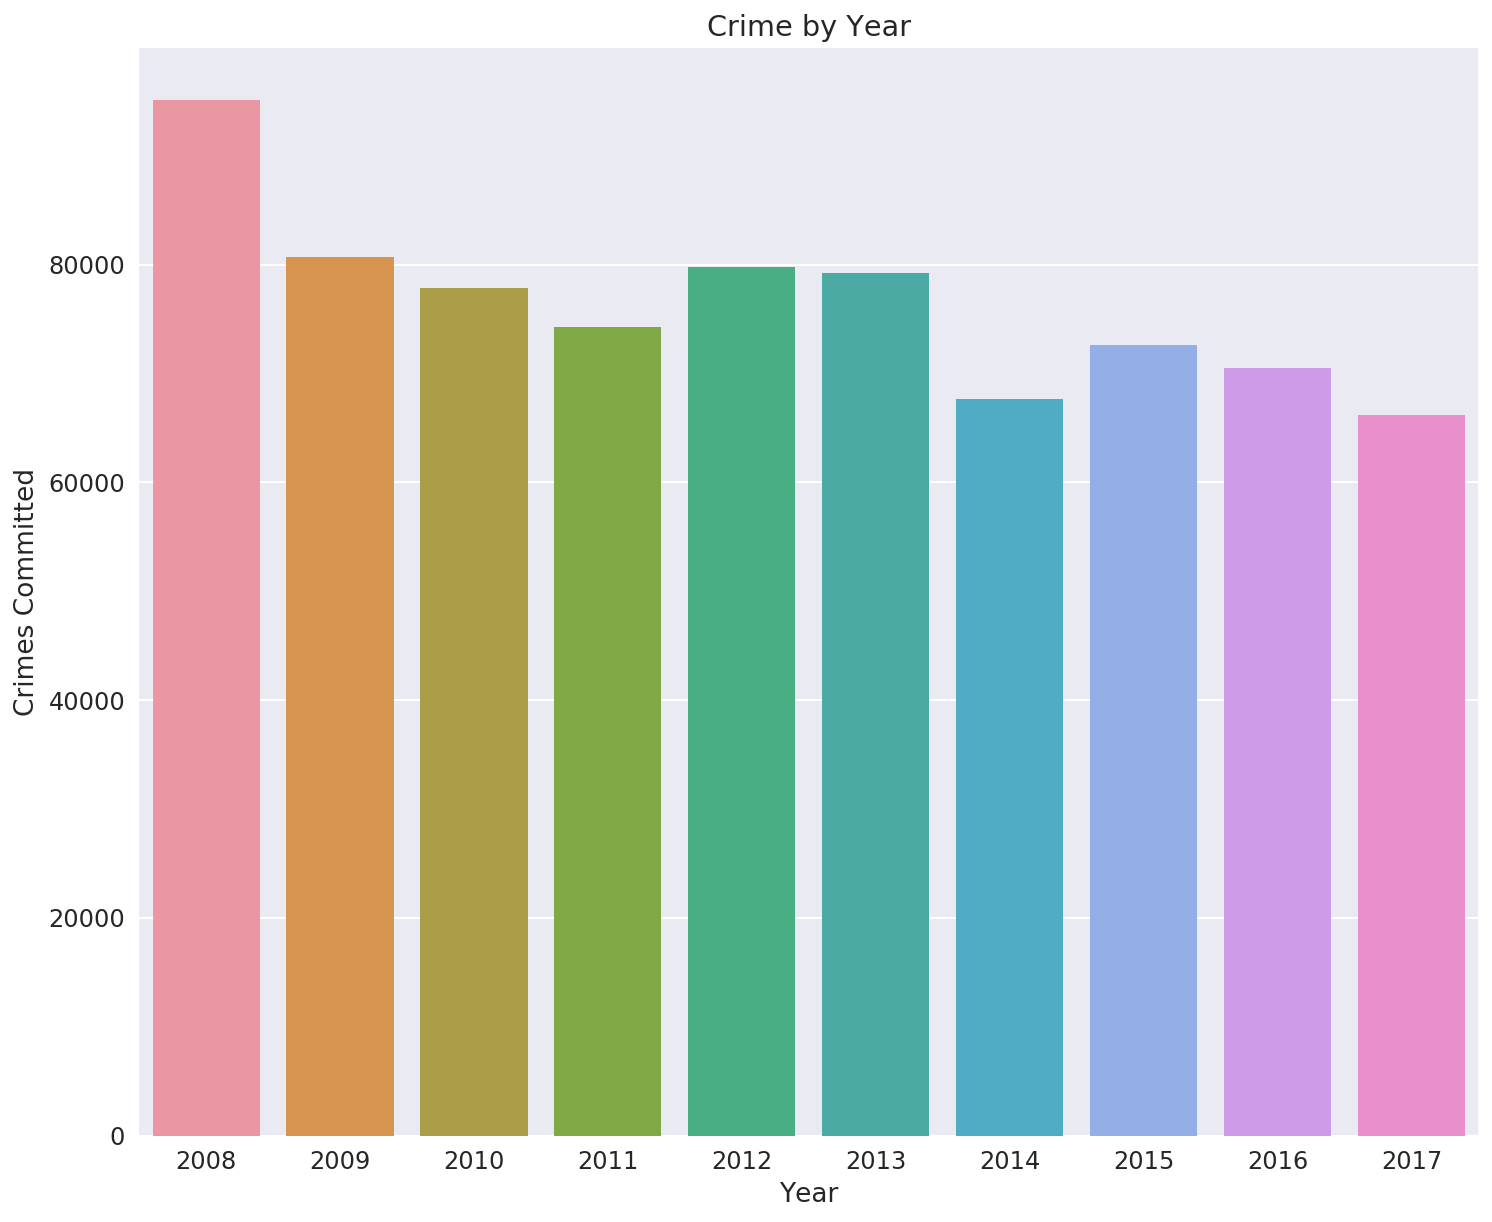

In [60]:
ax = sns.barplot(y=mc['total'].unstack(level=0).sum().reset_index().drop('years', axis=1).squeeze().values,
                 x=np.arange(2008, 2018))

ax.title.set_text("Crime by Year")
ax.set_xlabel('Year')
ax.set_ylabel('Crimes Committed')

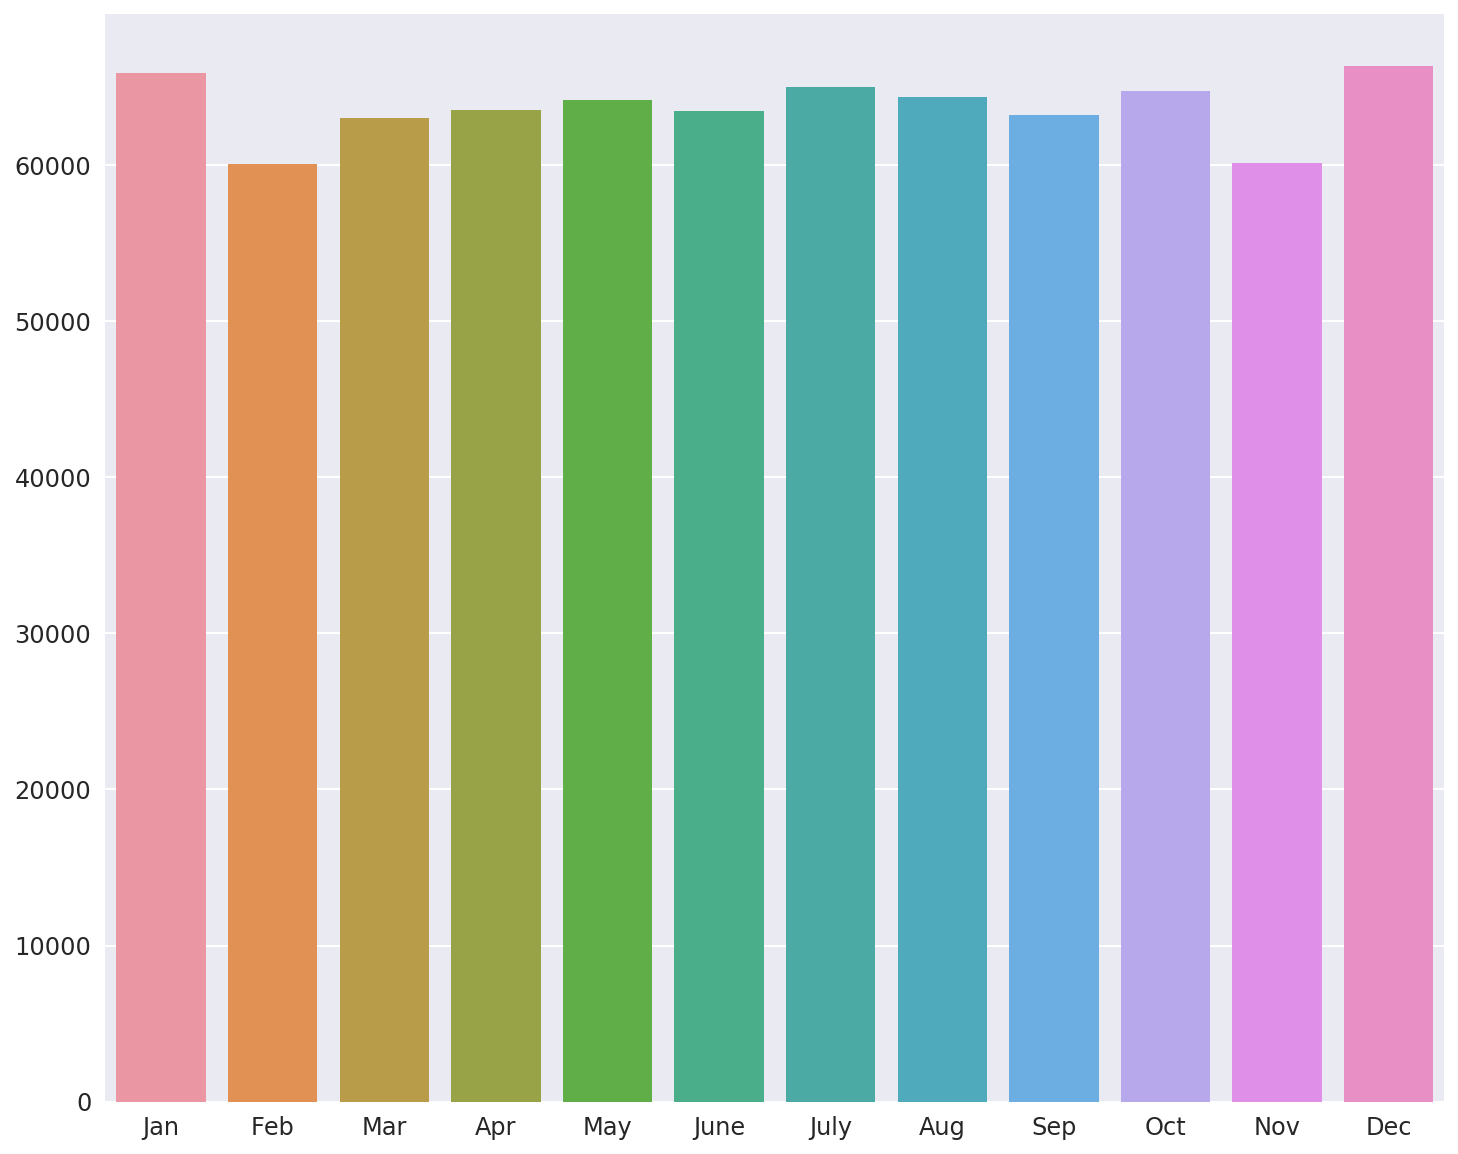

In [61]:
ax = sns.barplot(y=mc['total'].unstack(level=0).reindex(months).sum(axis=1).values, x=months)
# ax.set(ylim=(55000, 75000))

Text(0,0.5,'Crimes Committed')

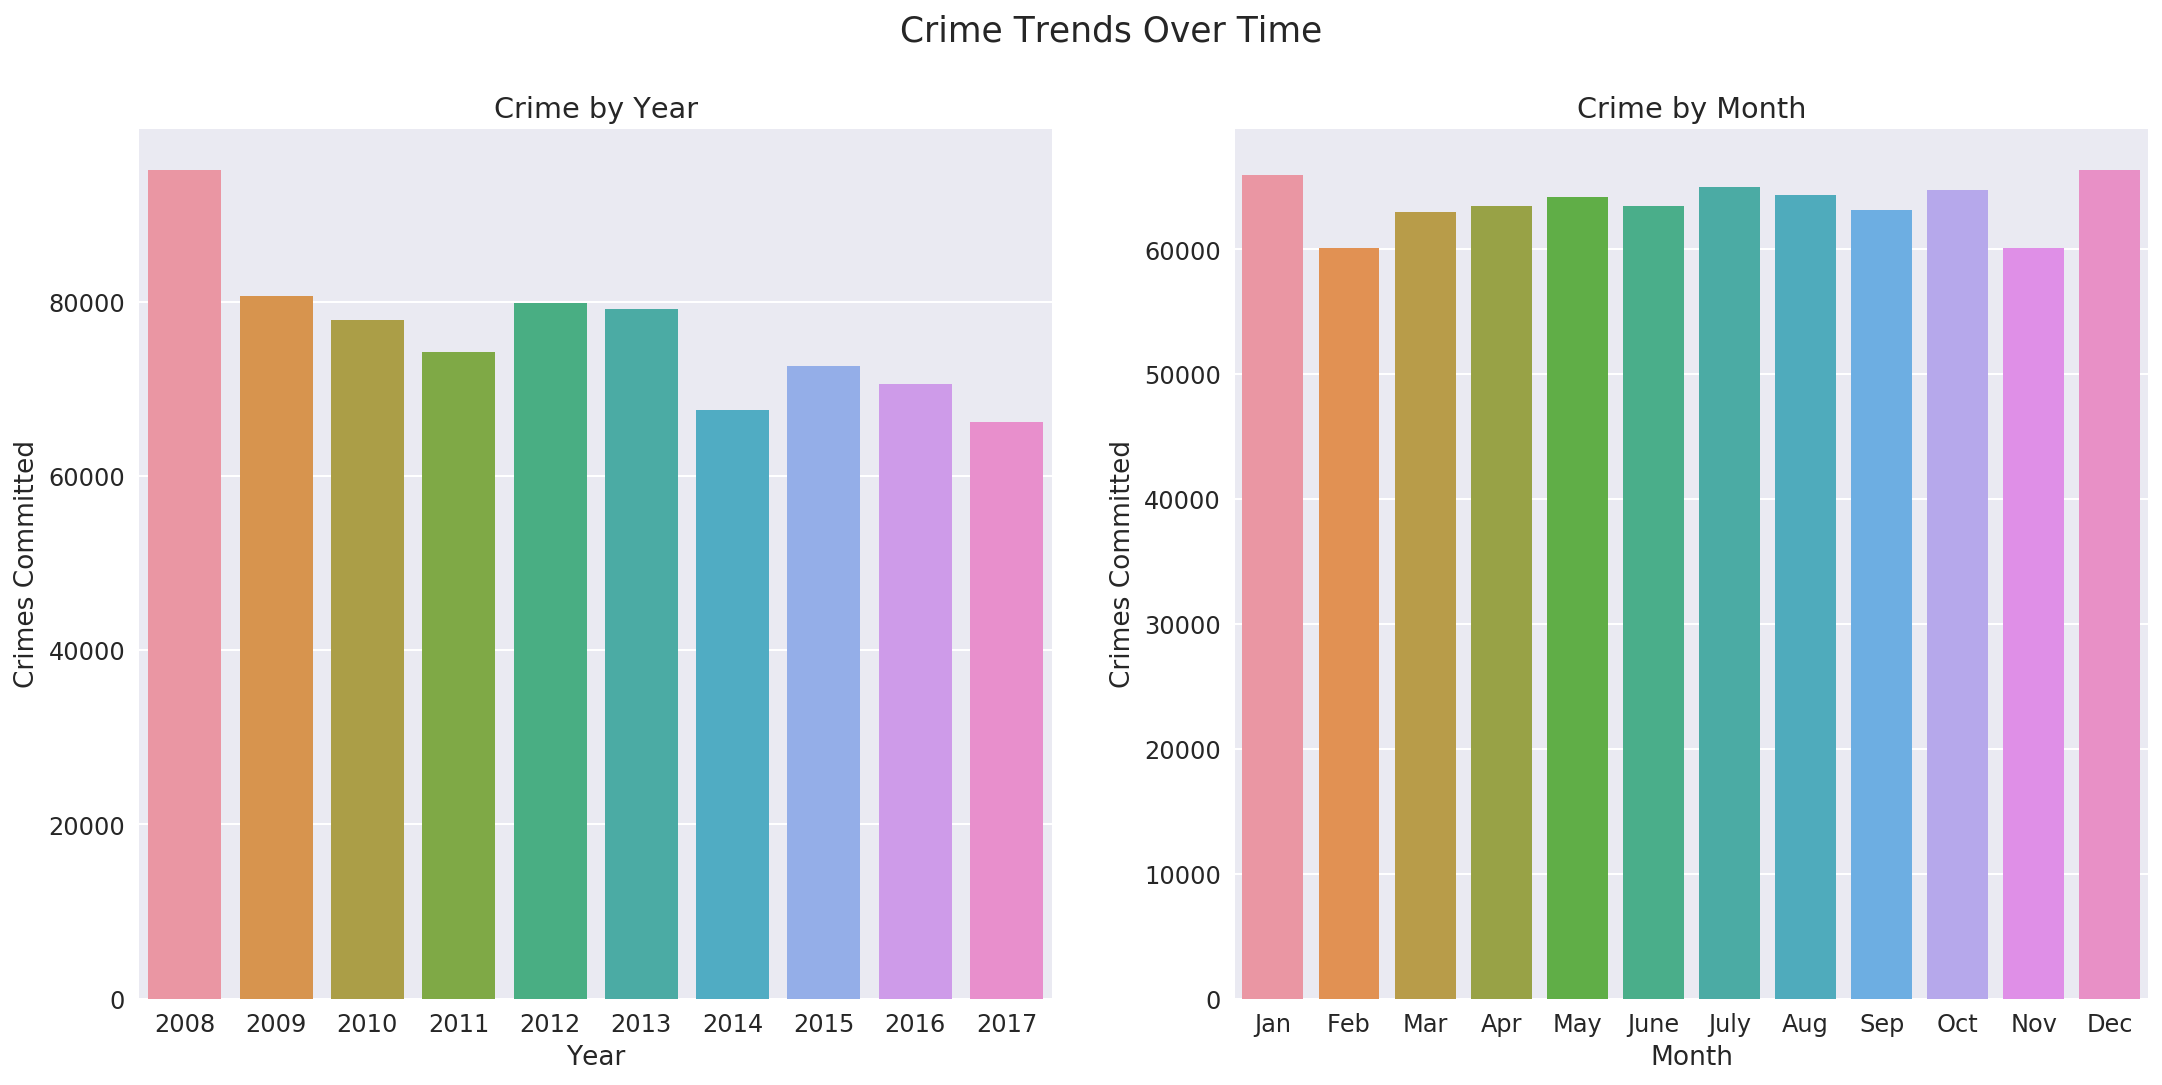

In [65]:
fig, axarr = plt.subplots(1, 2, figsize=(18, 8))
plt.suptitle("Crime Trends Over Time")

ax = sns.barplot(y=mc['total'].unstack(level=0).sum().reset_index().drop('years', axis=1).squeeze().values,
                 x=np.arange(2008, 2018), ax=axarr[0])

ax.title.set_text("Crime by Year")
ax.set_xlabel('Year')
ax.set_ylabel('Crimes Committed')

ax2 = sns.barplot(y=mc['total'].unstack(level=0).reindex(months).sum(axis=1).values, x=months,
                  ax=axarr[1])
ax2.title.set_text("Crime by Month")
ax2.set_xlabel('Month')
ax2.set_ylabel('Crimes Committed')

In [189]:
mc.columns

Index([u'murder', u'rape', u'armed_robbery', u'strong_arm_robbery',
       u'aggravated_assault', u'total_violent_crime', u'residential_burglary',
       u'non_residential_burglary', u'total_burglary', u'theft_above_400',
       u'theft_below_400', u'total_thefts', u'motor_vehicle_theft',
       u'total_property_crime', u'total'],
      dtype='object')

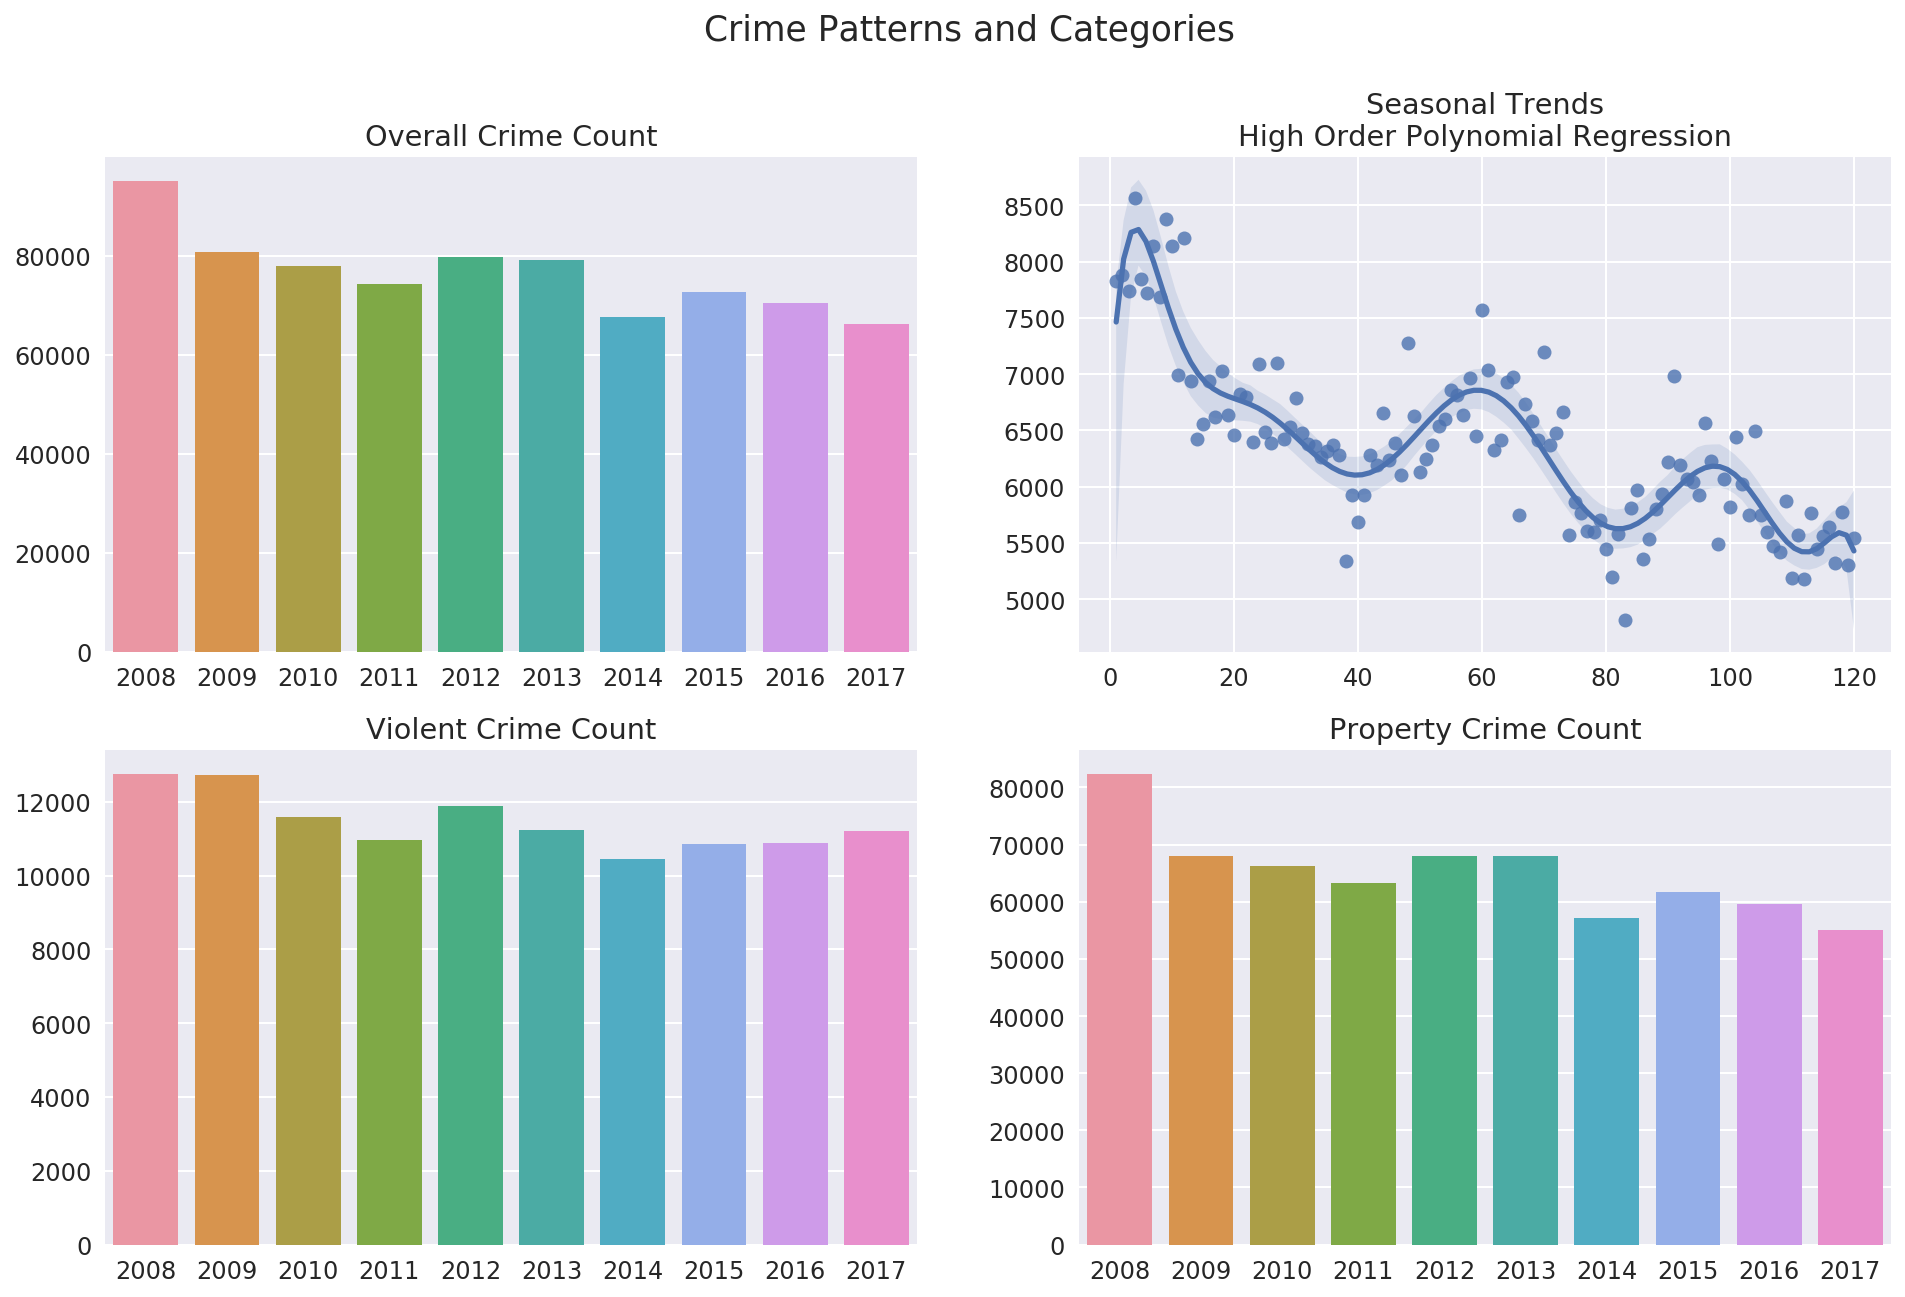

In [59]:
sns.set(font_scale=1.2)
fig, axarr = plt.subplots(2, 2, figsize=(16, 10))
plt.suptitle("Crime Patterns and Categories")

total = sns.barplot(y=mc['total'].unstack(level=0).sum().reset_index().drop('years', axis=1).squeeze().values,
                 x=np.arange(2008, 2018), ax=axarr[0][0])
total_vc = sns.barplot(y=mc['total_violent_crime'].unstack(level=0).sum().reset_index().drop('years', axis=1).squeeze().values,
                 x=np.arange(2008, 2018), ax=axarr[1][0])
total_pc = sns.barplot(y=mc['total_property_crime'].unstack(level=0).sum().reset_index().drop('years', axis=1).squeeze().values,
                 x=np.arange(2008, 2018), ax=axarr[1][1])
reg = sns.regplot(x=np.arange(1, 121), y=mc['total'].values, order=10, n_boot=1000, truncate=True,
                 ax = axarr[0][1])

# axarr[0][0] = total
# axarr[0][1] = total_vc
# axarr[1][0] = total_t
# axarr[1][1] = total_pc
total.title.set_text('Overall Crime Count')
reg.title.set_text('Seasonal Trends\nHigh Order Polynomial Regression')
total_vc.title.set_text('Violent Crime Count')
total_pc.title.set_text('Property Crime Count')

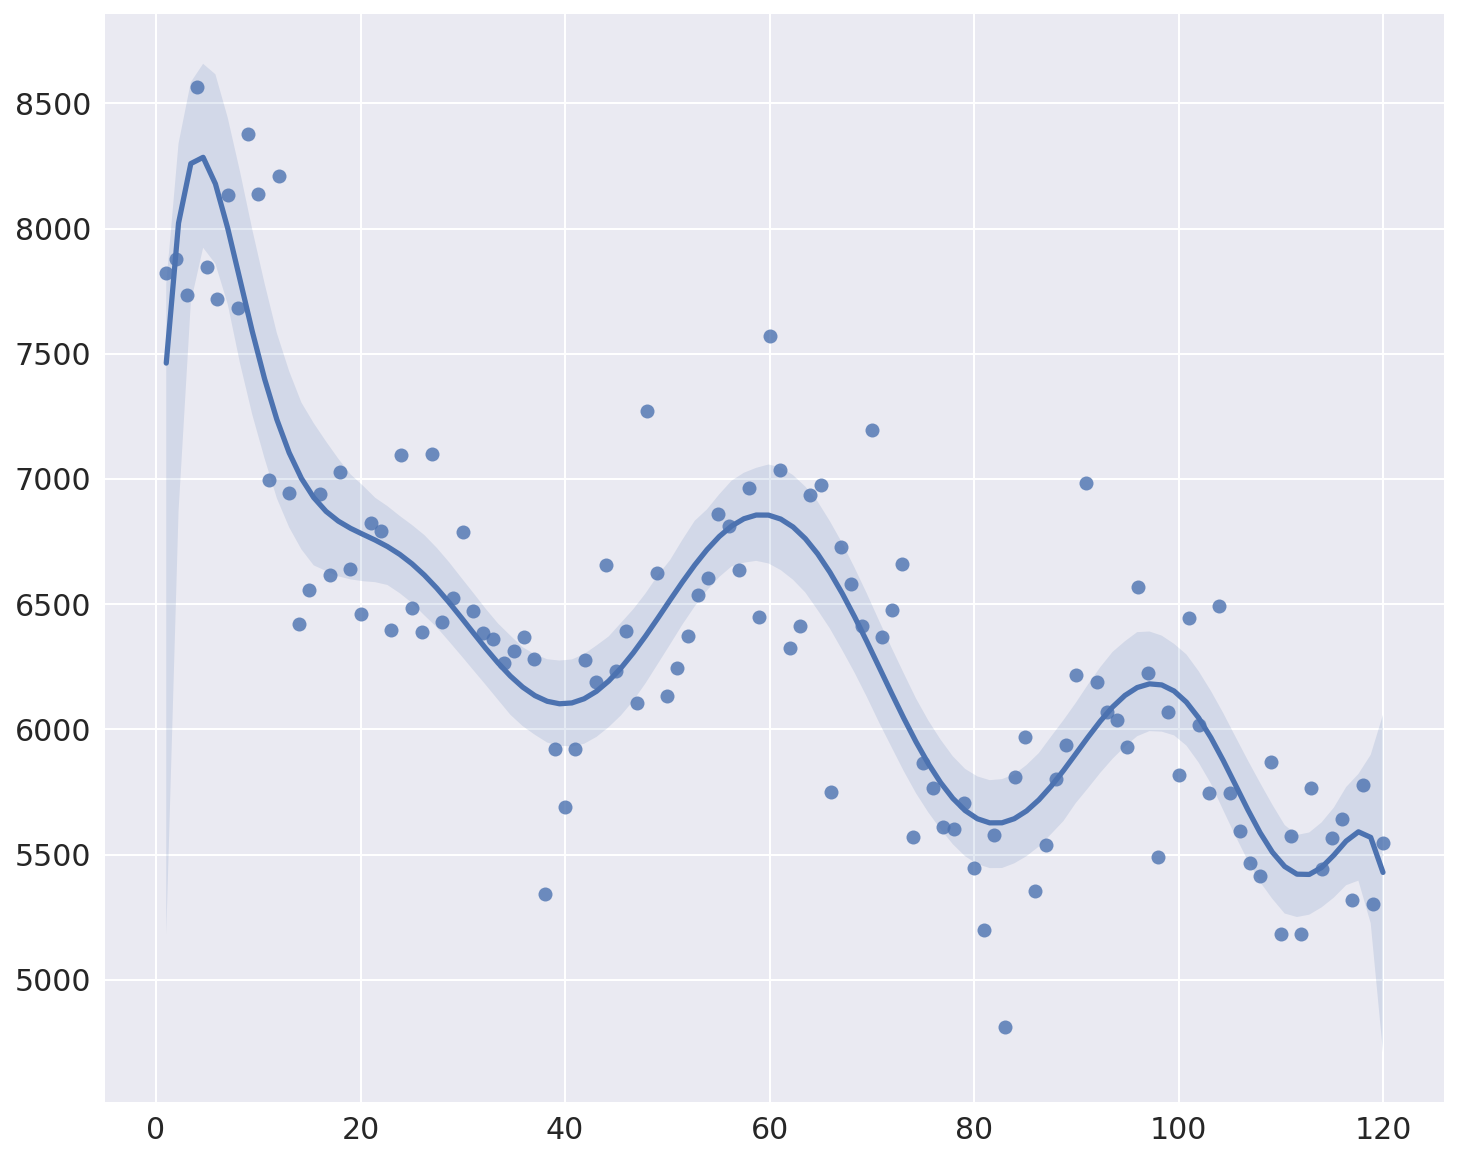

In [44]:
ax = sns.regplot(x=np.arange(1, 121), y=mc['total'].values, order=10, n_boot=1000, truncate=True)

In [227]:
mc['total'].values.squeeze().astype(float)

array([7823., 7877., 7735., 8567., 7848., 7720., 8135., 7682., 8379.,
       8138., 6995., 8210., 6942., 6421., 6558., 6940., 6616., 7028.,
       6640., 6462., 6823., 6793., 6395., 7094., 6486., 6389., 7100.,
       6427., 6526., 6790., 6473., 6383., 6362., 6265., 6314., 6368.,
       6282., 5343., 5922., 5689., 5922., 6278., 6188., 6657., 6232.,
       6391., 6106., 7272., 6626., 6134., 6245., 6374., 6538., 6605.,
       6860., 6814., 6638., 6962., 6450., 7571., 7036., 6324., 6413.,
       6934., 6977., 5748., 6730., 6582., 6412., 7194., 6370., 6477.,
       6659., 5570., 5867., 5766., 5608., 5600., 5707., 5447., 5199.,
       5576., 4813., 5811., 5969., 5353., 5538., 5802., 5937., 6216.,
       6984., 6189., 6068., 6039., 5929., 6569., 6225., 5492., 6069.,
       5819., 6444., 6019., 5747., 6493., 5745., 5593., 5468., 5415.,
       5869., 5184., 5573., 5183., 5766., 5444., 5564., 5642., 5319.,
       5776., 5303., 5546.])

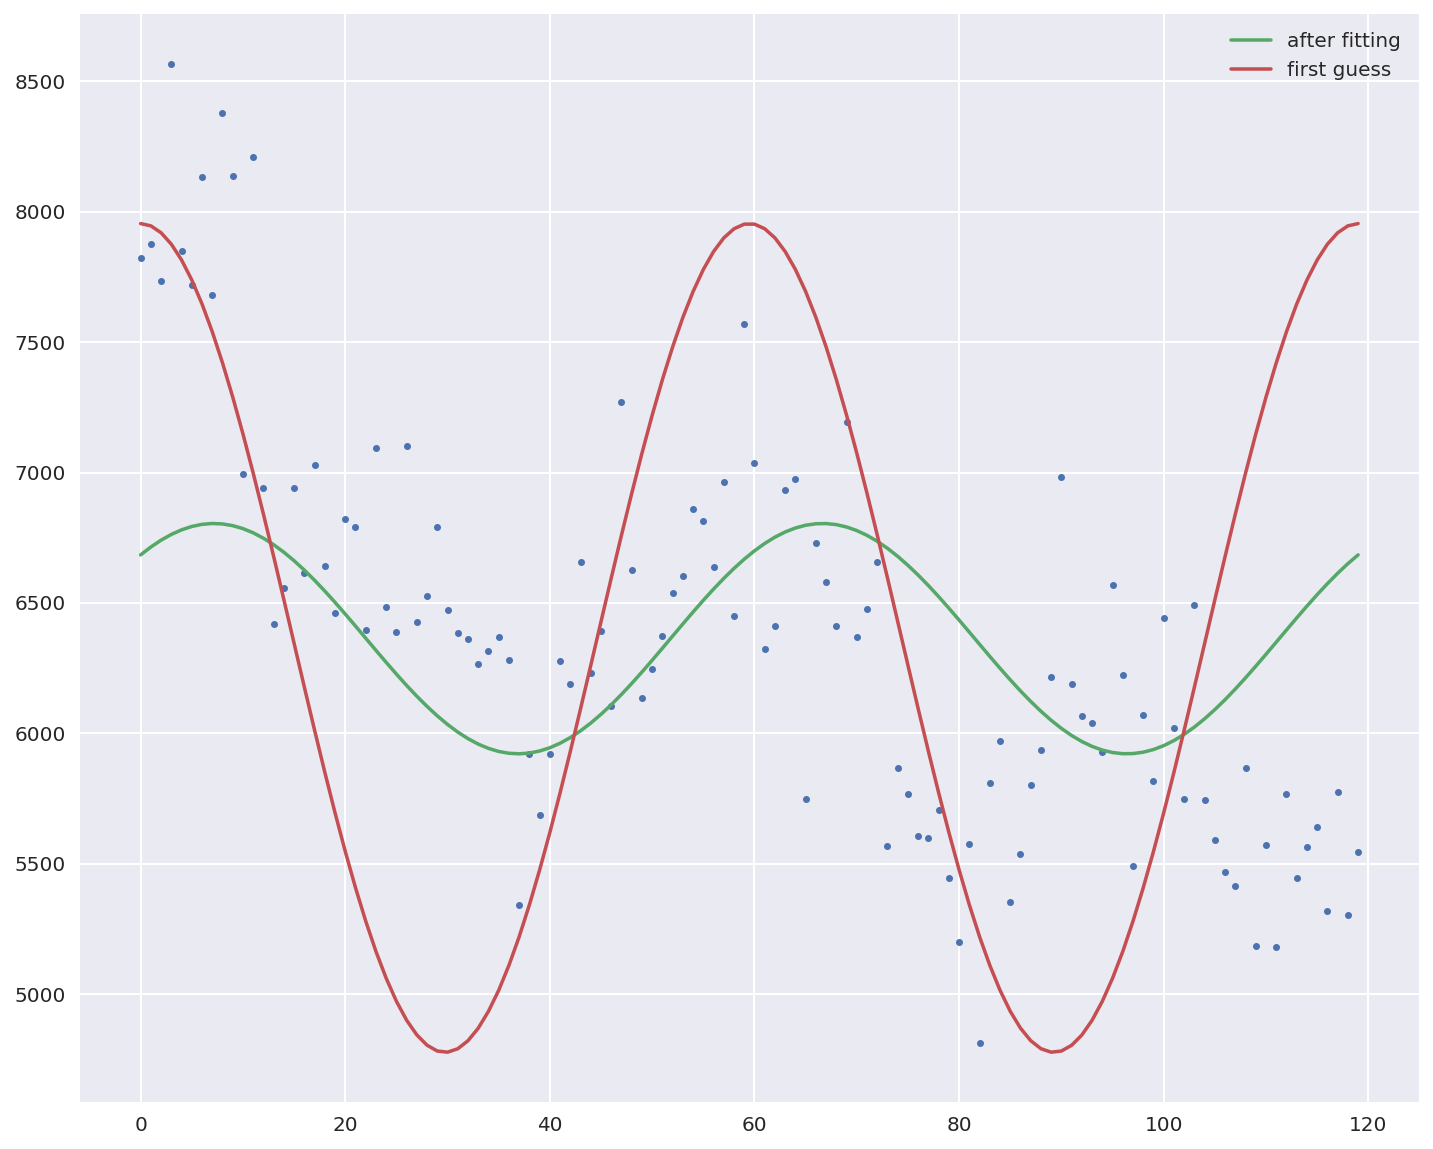

In [235]:
# shitty regression model, doesn't work well
# only fits sin, not polynomial sin
# found on stackoverflow

import numpy as np
from scipy.optimize import leastsq
import pylab as plt

N = 120 # number of data points
t = np.linspace(0, 4*np.pi, N)
# data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise
data = mc['total'].values.squeeze().astype(float)

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)
guess_phase = 0

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.cos(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.cos(t+x[1]) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_std*np.cos(t+est_phase) + est_mean

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()